In [575]:
using LinearAlgebra, Plots, FFTW

# Preliminary Study

# Vectorization (mathematics)

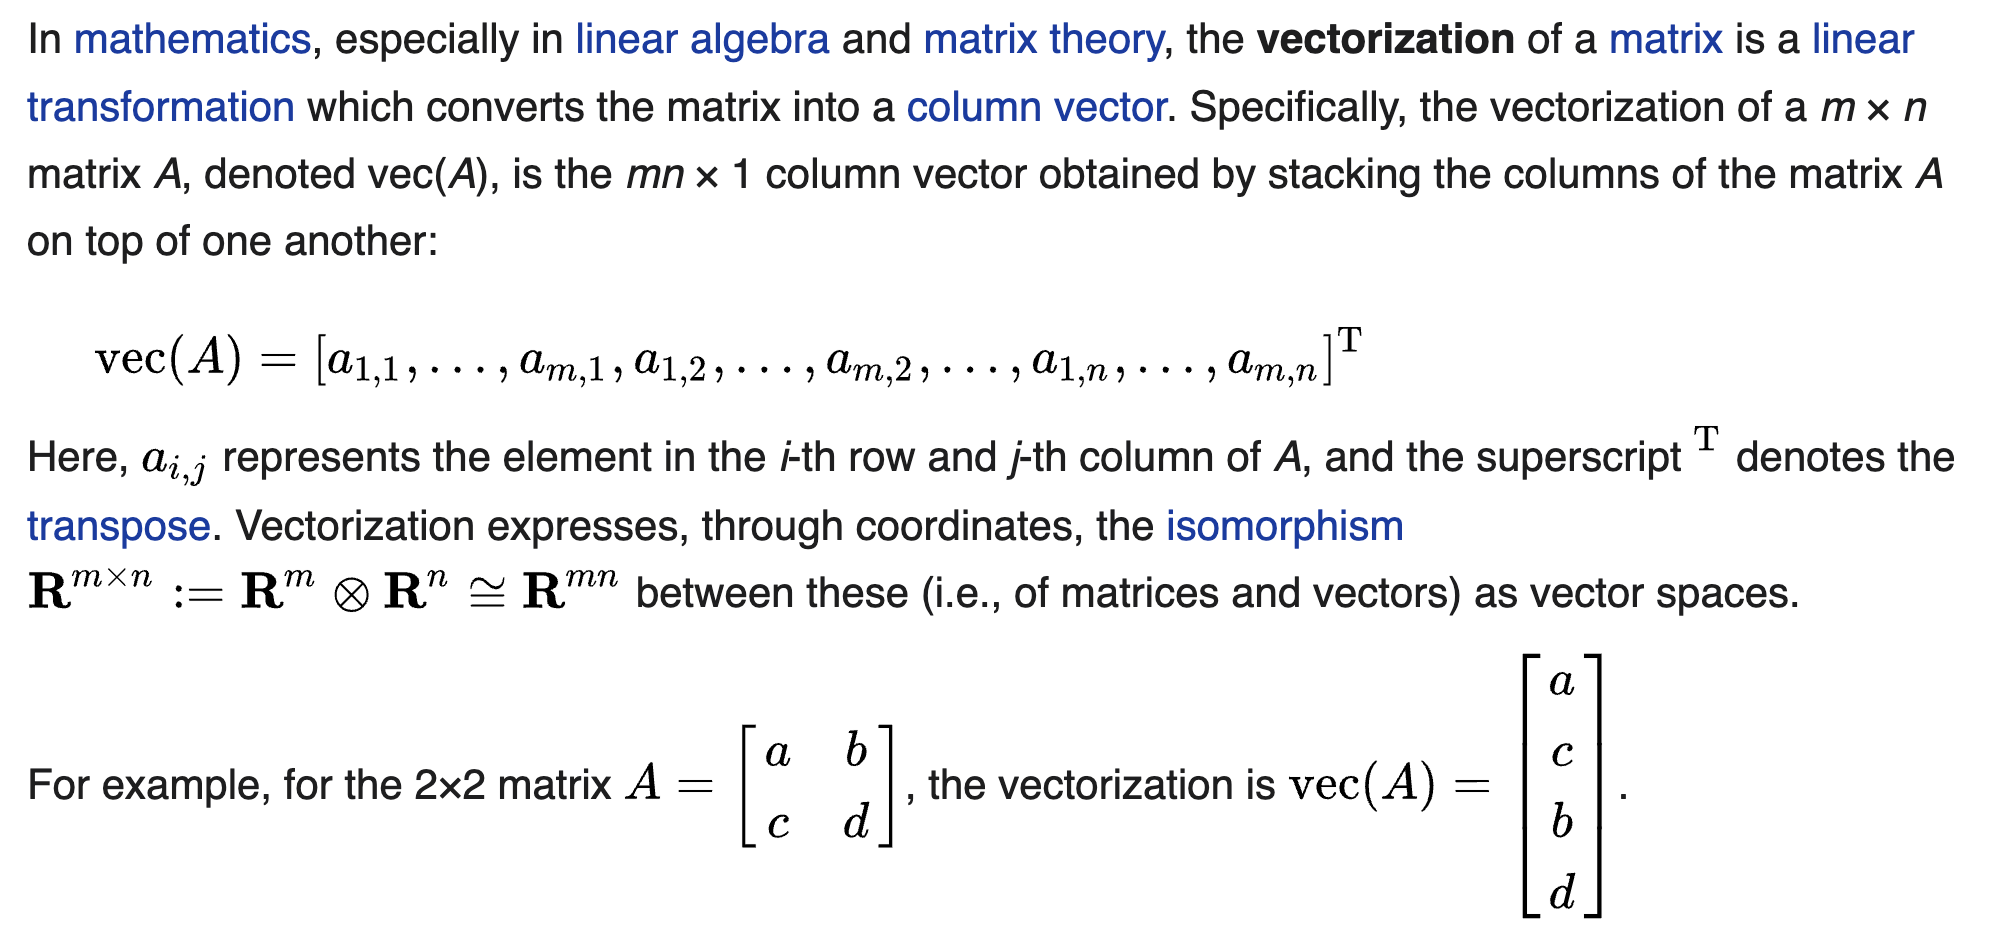

(예제)

In [80]:
A= [1 2 
    3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [81]:
vec(A)

4-element Vector{Int64}:
 1
 3
 2
 4

## Kronecker product

크로네커곱의 정의는 아래와 같다. 

$${\bf A} \otimes {\bf B}
=\begin{bmatrix}
a_{11}{\bf B} & a_{12}{\bf B} & \dots & a_{1m}{\bf B} \\ 
a_{21}{\bf B} & a_{22}{\bf B} & \dots & a_{2m}{\bf B} \\ 
\dots & \dots & \dots & \dots \\
a_{n1}{\bf B} & a_{n2}{\bf B} & \dots & a_{nm}{\bf B} \\ 
\end{bmatrix}$$

두 행렬 ${\bf A}_{m\times n}$, ${\bf B}_{p\times q}$의 크로네커곱 ${\bf A}\otimes {\bf B}$의 차원은 $mp \times nq$ 가 된다. 계산예시는 아래와 같다. 

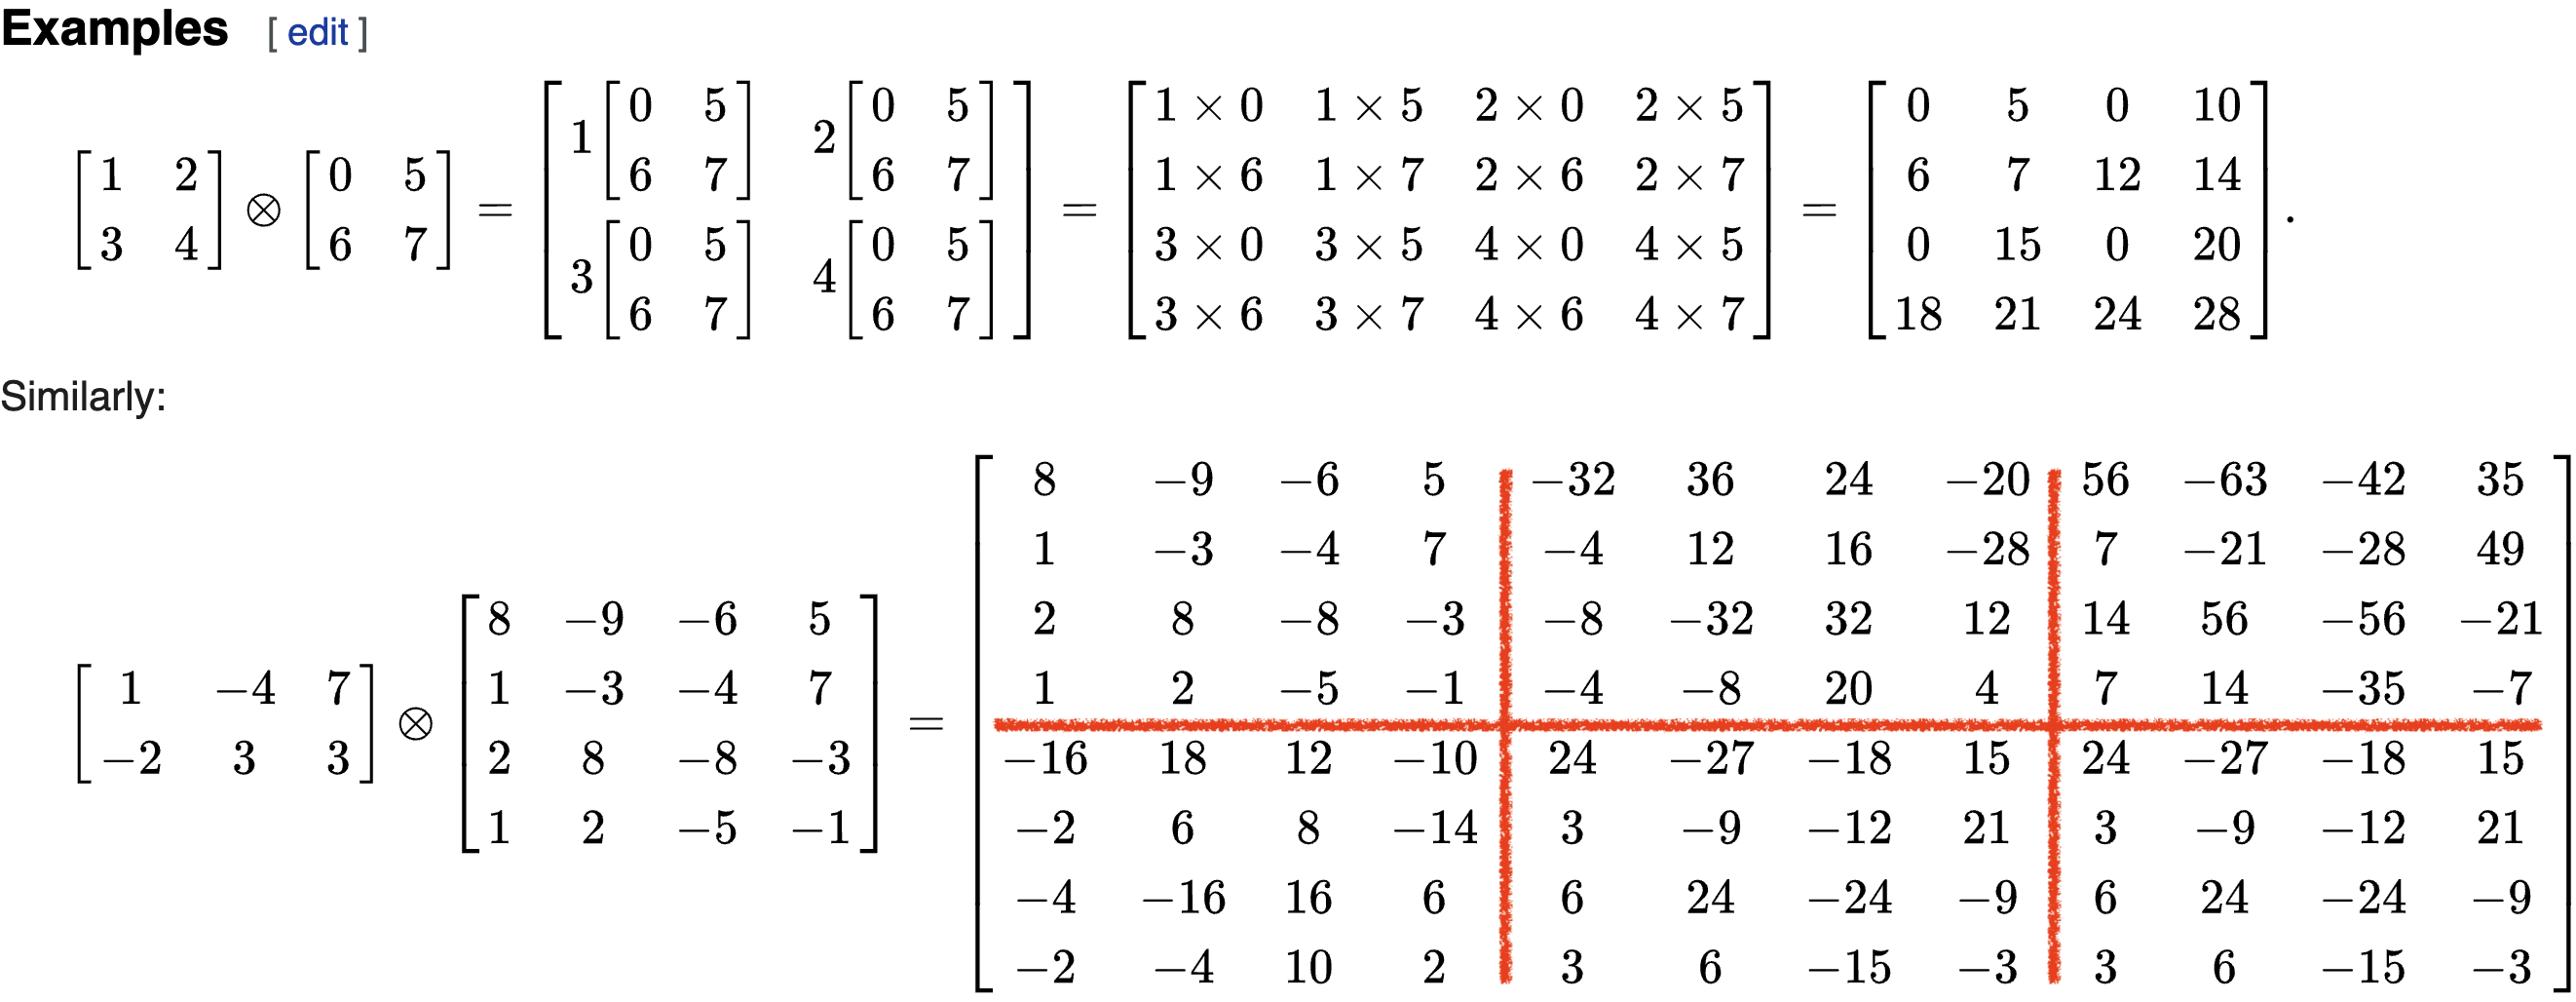

크로네커곱에 대한 성질들이 위키에 많이 있으니 참고하면 좋다. 

(예제1)

In [82]:
A= [1 2
    3 4]
B= [0 5
    6 7]
C = kron(A, B)

4×4 Matrix{Int64}:
  0   5   0  10
  6   7  12  14
  0  15   0  20
 18  21  24  28

(예제2)

In [83]:
A= [1 -4 7; -2 3 3]
B= [8 -9 -6 -5; 1 -3 -4 7; 2 8 -8 -3; 1 2 -5 -1]
C = kron(A, B)

8×12 Matrix{Int64}:
   8   -9  -6   -5  -32   36   24   20  56  -63  -42  -35
   1   -3  -4    7   -4   12   16  -28   7  -21  -28   49
   2    8  -8   -3   -8  -32   32   12  14   56  -56  -21
   1    2  -5   -1   -4   -8   20    4   7   14  -35   -7
 -16   18  12   10   24  -27  -18  -15  24  -27  -18  -15
  -2    6   8  -14    3   -9  -12   21   3   -9  -12   21
  -4  -16  16    6    6   24  -24   -9   6   24  -24   -9
  -2   -4  10    2    3    6  -15   -3   3    6  -15   -3

## Khatri–Rao product

카트리-라오곱은 매트릭스 ${\bf A}$와 ${\bf B}$가 같은 차원의 블락매트릭스로 정의될때 각 서브매트릭스의 크로네커 곱으로 정의된다. 정의와 계산예시는 아래와 같다. 

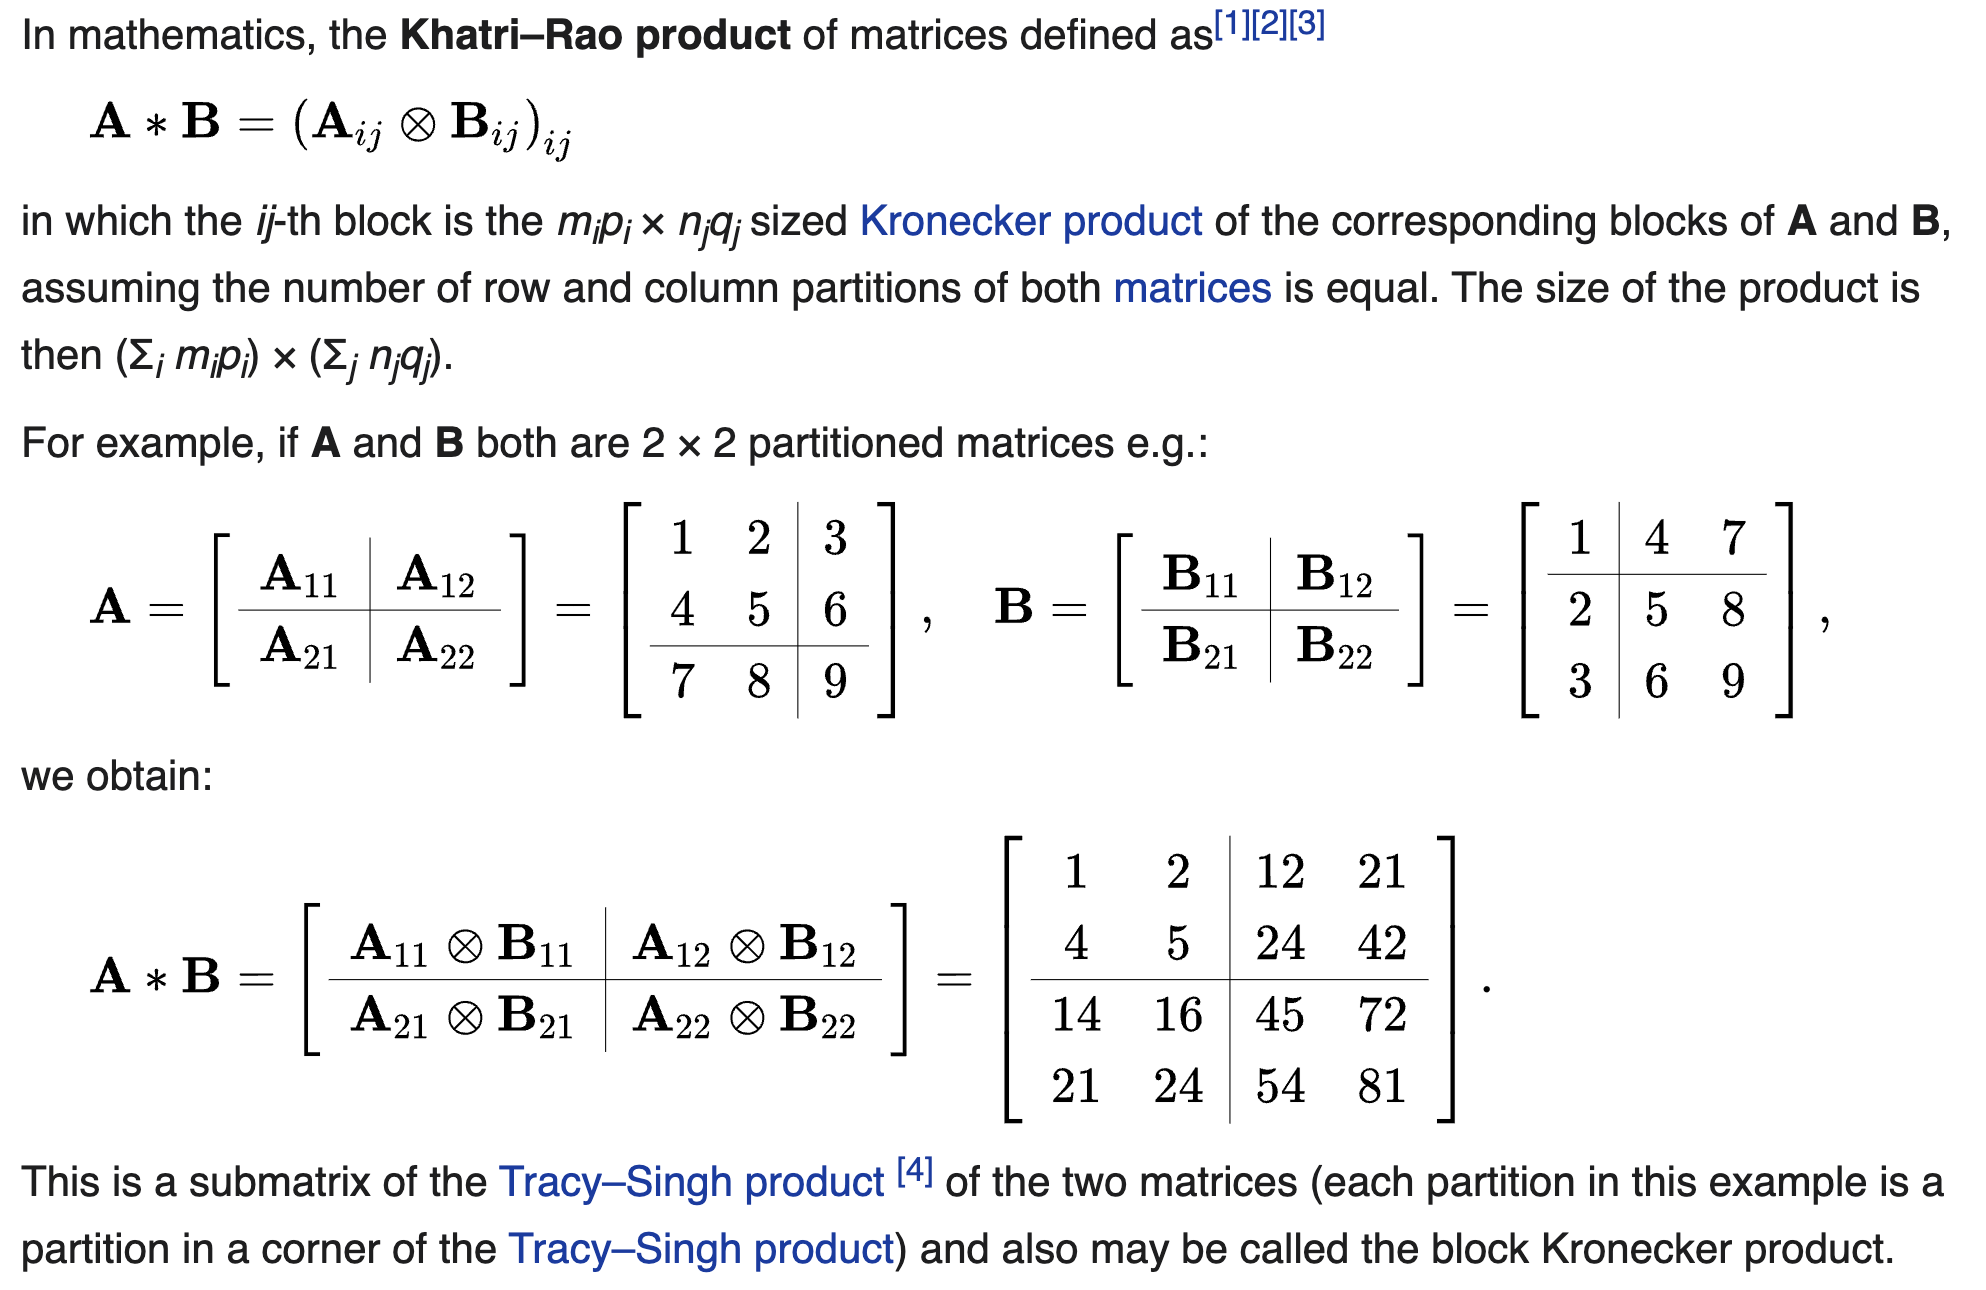

또 다른 계산예시는 아래와 같다. 이 예제는 중요하니까 구현해보자. 

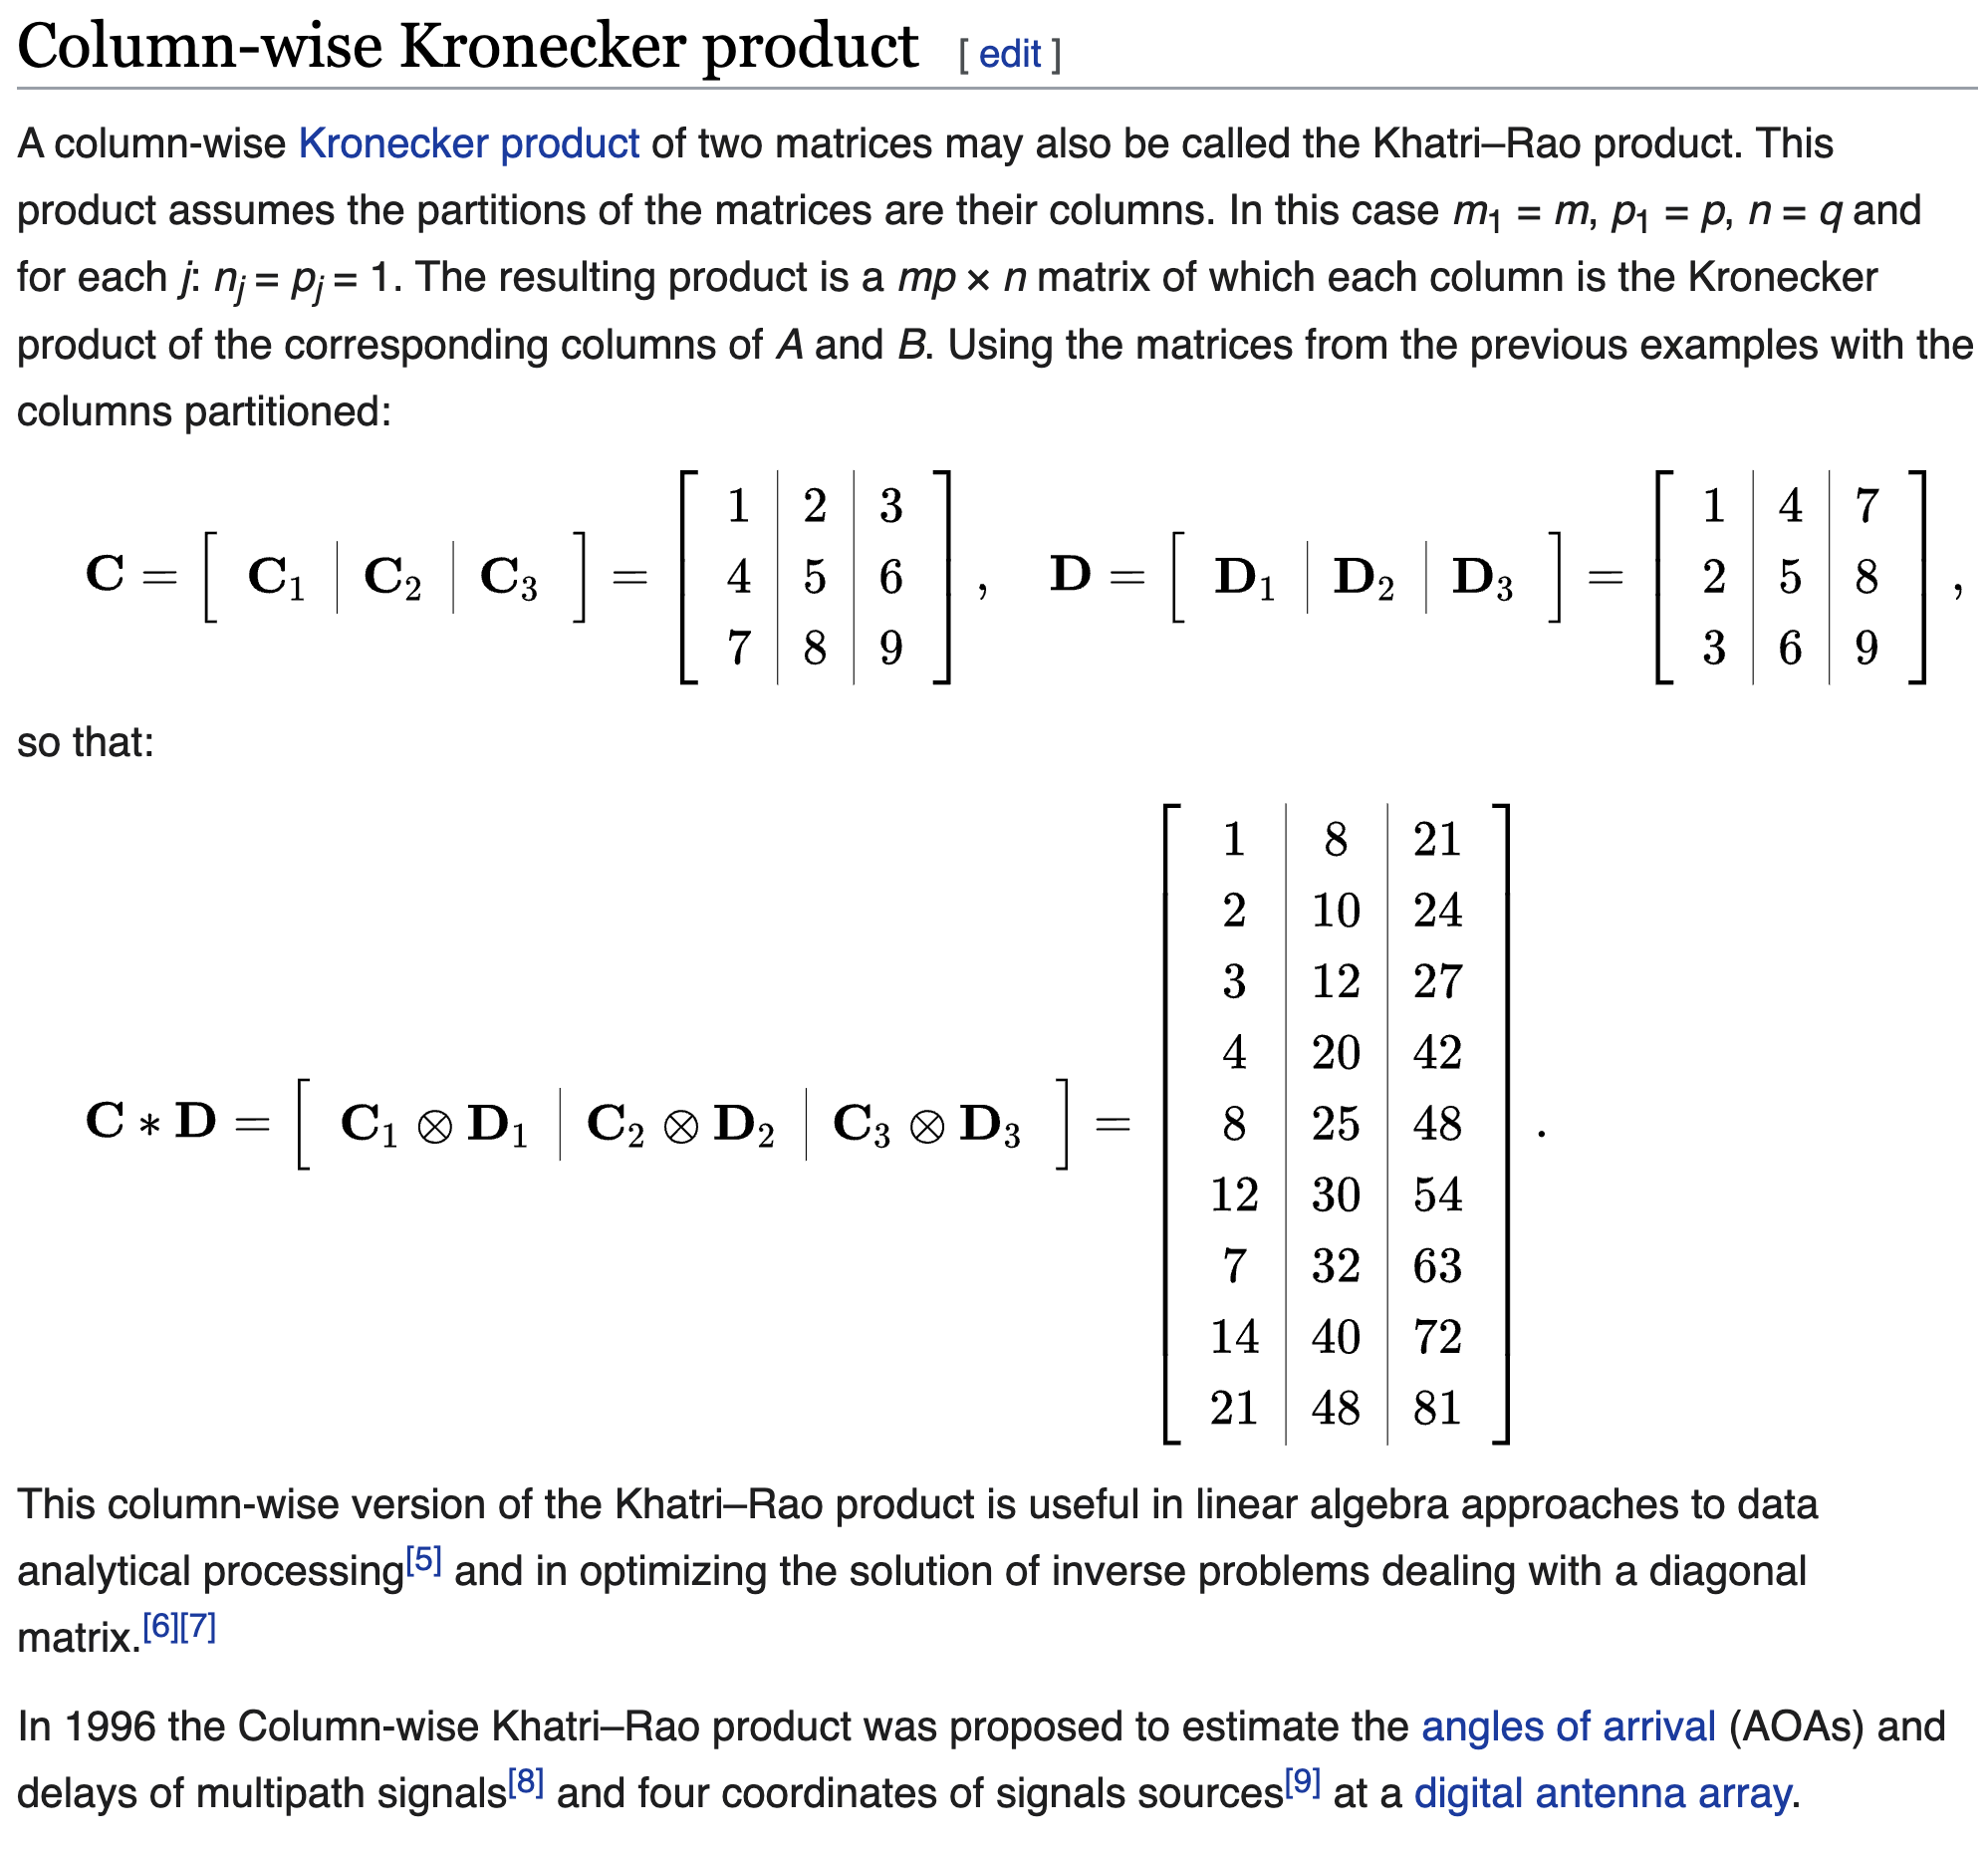


(예제1)

In [302]:
C= [1 2 3 
    4 5 6 
    7 8 9] 
D= [1 4 7
    2 5 8
    3 6 9]

3×3 Matrix{Int64}:
 1  4  7
 2  5  8
 3  6  9

In [303]:
hcat([kron(C[:,i],D[:,i]) for i in 1:3]...)

9×3 Matrix{Int64}:
  1   8  21
  2  10  24
  3  12  27
  4  20  42
  8  25  48
 12  30  54
  7  32  63
 14  40  72
 21  48  81

이건 자주 쓸일이 있을것 같으니까 함수로 저장하자. 

In [304]:
columnwise_kron = 
(C,D) -> hcat([kron(C[:,i],D[:,i]) for i in 1:size(C)[2]]...)

#181 (generic function with 1 method)

In [305]:
columnwise_kron(C,D)

9×3 Matrix{Int64}:
  1   8  21
  2  10  24
  3  12  27
  4  20  42
  8  25  48
 12  30  54
  7  32  63
 14  40  72
 21  48  81

# 12.2.1. Power Spectral Density


> @djuric2018cooperative 의 Chap 12.2.1, Chap 12.3

**Definition 12.3.** The PSD of a random process ${\bf x}$ that is stationary with respect to GSO ${\bf S}={\bf V}{\bf \Lambda}{\bf V}^H$ is the nonnegative $N \times 1$ vector ${\bf p}$ 

$${\bf p}:=\text{diag}\big({\bf V}^H {\bf C}_{\bf x}{\bf V} \big).$$

OversObserve that because ${\bf C}_{\bf x}$ is diagonalized by ${\bf V}$ the matrix ${\bf V}^H{\bf C}_{\bf x}{\bf V}$ is diagonal and it follows that the PSD in above equation corresponds to the eigenvalues of the positive semidefinite covariance matrix ${\bf C}_{\bf x}$. Thus, above equation is equivalent to

$${\bf C}_{\bf x}={\bf V}\text{diag}({\bf p}){\bf V}^H.$$

Zero-mean white noise is an example of a random process that is stationary with respect to any graph shift ${\bf S}$. The PSD of white noise with covariance $\mathbb{E}[{\bf n}{\bf n}^H] = \sigma^2{\bf I}$ is ${\bf p} = \sigma^2{\bf 1}$^[${\bf 1}$ is length $N$ vector with all elements are 1]. Also notice that, by definition, any random process ${\bf x}$ is stationary with respect to the shift ${\bf S} = {\bf C}_{\bf x}$ defined by its covariance matrix, with corresponding PSD ${\bf p} = \text{diag}({\bf \Lambda})$. This can be exploited in the context of network topology inference. Given a set of graph signals $\{{\bf x}_r\}_{r=1}^R$ it is common to infer the underlying topology by building a graph ${\cal G}_{corr}$ whose edge weights correspond to cross-correlations among the entries of the signals. In that case, the process generating those signals is stationary in the shift given by the adjacency of ${\cal G}_{corr}$; see @segarra2017network for details. A random process x is also stationary with respect to the shift given by its precision matrix, which is defined as the (pseudo-)inverse ${\bf \Theta}= {\bf C}^{\dagger}_{\bf x}$. The PSD, in this case, is ${\bf p} = \text{diag}(\Lambda)^{\dagger}$. This is particularly important when ${\bf x}$ is a Gaussian Markov Random Field (GMRF) whose Markovian dependence is captured by the unweighted graph ${\cal G}_{MF}$. It is well known @segarra2017network Ch. 19 that in these cases ${\bf \Theta}_{i,j}$ can be nonzero only if $(i,j)$ is either a link of ${\cal G}_{MF}$ , or an element in the diagonal. Thus, any GMRF is stationary with respect to the sparse shift ${\bf S} = {\bf 
\Theta}$, which captures the conditional dependence between the elements of ${\bf x}$.
Two important properties that hold for random processes in time can be shown to be true as well for the PSD of graph processes.

**Property 12.1** Let ${\bf x}$ be stationary in ${\bf S}$ with covariance ${\bf C}_{\bf x}$ and PSD ${\bf p}_x$. Consider a filter ${\bf H}$ with frequency response $\tilde{\bf h}$ and define ${\bf y}:={\bf H}{\bf x}$. Then, the process ${\bf y}$: 

(a) Is stationary in ${\bf S}$ with covariance ${\bf C}_{\bf y}= {\bf H}{\bf C}_{\bf x}{\bf H}^H$. 

(b) Has a PSD given by ${\bf p}_{\bf y}=|\tilde{\bf h}|^2 \circ {\bf p}_{\bf x}$, where $|\cdot|^2$ is applied elementwise. 

> Here $\circ$ is elementwise matrix product

**Property 12.2** Given a process ${\bf x}$ stationary in ${\bf S}={\bf V}{\bf \Lambda}{\bf V}^H$ with PSD ${\bf p}$, define the GFT process as $\tilde{\bf x}={\bf V}^H{\bf x}$. Then, it holds that $\tilde{\bf x}$ is uncorrelated and its covariance matrix is 

$${\bf C}_{\tilde{\bf x}}:= \mathbb{E}\left[\tilde{\bf x}\tilde{\bf x}^H \right]=\mathbb{E}\left[({\bf V}^H{\bf x})({\bf V}^H{\bf x})^H \right]=\text{diag}({\bf p}).$$

Property 12.1 is a statement of the spectral convolution theorem for graph signals. Property 12.2 is fundamental to motivate the analysis and modeling of stationary graph processes in the frequency domain, which we undertake in the remainder of this chapter. It also shows that if a process ${\bf x}$ is stationary in the shift ${\bf S} = {\bf V}{\bf \Lambda}{\bf V}^H$, then the GFT ${\bf V}^H$ provides the Karhunen-Loève expansion of the process.

The concept of stationarity and, consequently, that of PSD can be extended to processes defined jointly in a graph and over time. Before we review this extension in the ensuing section, we discuss requirements on the first moment of stationary graph processes.

**The mean of stationary graph processes**. While Definitions 12.1 and 12.2 assume that the random process ${\bf x}$ has mean $\tilde{\bf x} := \mathbb{E}[{\bf x}] = {\bf 0}$, traditional stationary time processes are allowed to have a (nonzero) constant mean $\bar{\bf x} = \alpha{\bf 1}$, with $\alpha$ being an arbitrary scalar. Stationary graph processes, by contrast, are required to have a first-order moment of the form $\bar{\bf x} = \alpha {\bf v}_k$, i.e., a scaled version of an eigenvector of ${\bf S}$. This choice: (i) takes into account the structure of the underlying graph; (ii) maintains the validity of Property 12.1; and (iii) encompasses the case ${\bf v}_k = {\bf 1}$ when ${\bf S}$ is either the adjacency matrix of a directed cycle or the Laplacian of any graph, recovering the classical first-order requirement for weak stationarity.

# 12.3. Power Spectral Density Estimators 

We can exploit the fact that ${\bf x}$ is a stationary graph process in ${\bf S} = {\bf V}\text{diag}({\bf \Lambda}){\bf V}^H$ to design efficient estimators of the covariance ${\bf C}_{\bf x}$. In particular, instead of estimating ${\bf C}_{\bf x}$ directly, which has $N(N + 1)/2$ degrees of freedom, one can estimate ${\bf p}$ first, which only has $N$ degrees of freedom, and then leverage that ${\bf C}_{\bf x} = {\bf V}\text{diag}({\bf p}){\bf V}^H$.
Motivated by this, the focus of this section is on estimating ${\bf p}$, the PSD of a stationary random graph process ${\bf x}$, using as input either one or a few realizations $\{{\bf x}_r\}_{r=1}^R$ of ${\bf x}$. To illustrate the developments in Sections 12.3 and 12.4, we will use as a running example a random process defined on the well-known Zachary’s Karate club network @zachary1977information (Figs. 12.3 and 12.4). As shown in Fig. 12.4, this graph consists of 34 nodes or members of the club and 78 undirected edges symbolizing friendships among members.

![그림12.3(교재에서 긁어온 그림): Power spectral density estimation. All estimators are based on the same random process defined on the Karate club network [@zachary1977information]. (A) Periodogram estimation with different numbers of observations. (B) Windowed average periodogram from a single realization and a different number of windows. (C) Windowed average periodogram for four windows and a varying number of realizations. (D) Parametric MA estimation for 1 and 10 realizations.](attachment:27b3f625-0405-4e7f-b677-35aa91a95a68.png)
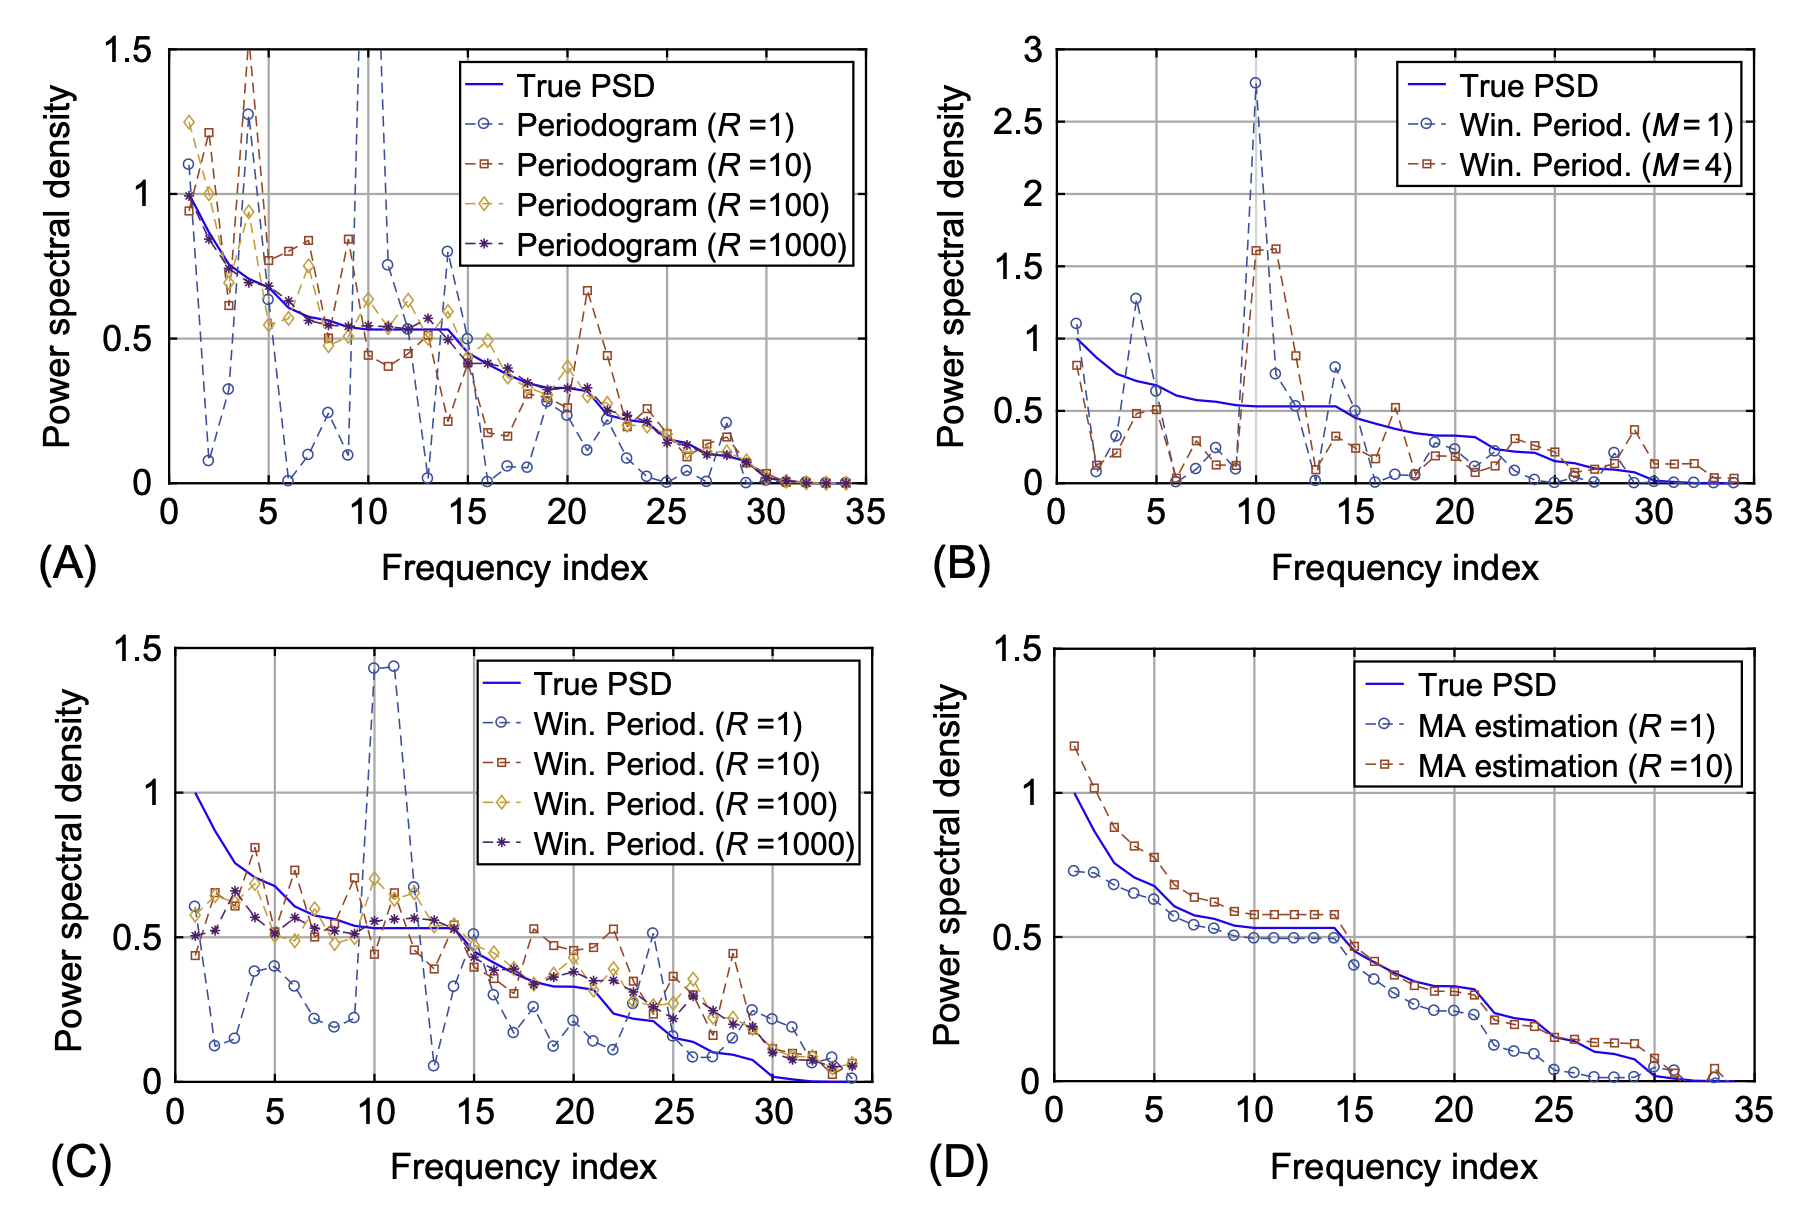

![그림12.4(교재에서 긁어온 그림): PSD estimation from a subset of nodes. Estimators are based on a random process defined on the Karate club network [@zachary1977information]. (A) Graph sampling for nonparametric PSD estimation. Here, 20 out of 34 nodes are observed. The sampled nodes are highlighted by the circles around the nodes. (B) Nonparametric PSD estimation based on observations from 20 nodes and 100 data snapshots. (C) Graph sampling for parametric MA PSD estimation. Here, 4 out of 34 nodes are observed. (D) Parametric MA PSD estimation based on observations from 4 nodes and 100 data snapshots.](attachment:f9528ecc-9143-4e3b-bff7-18e4b23a9651.png)
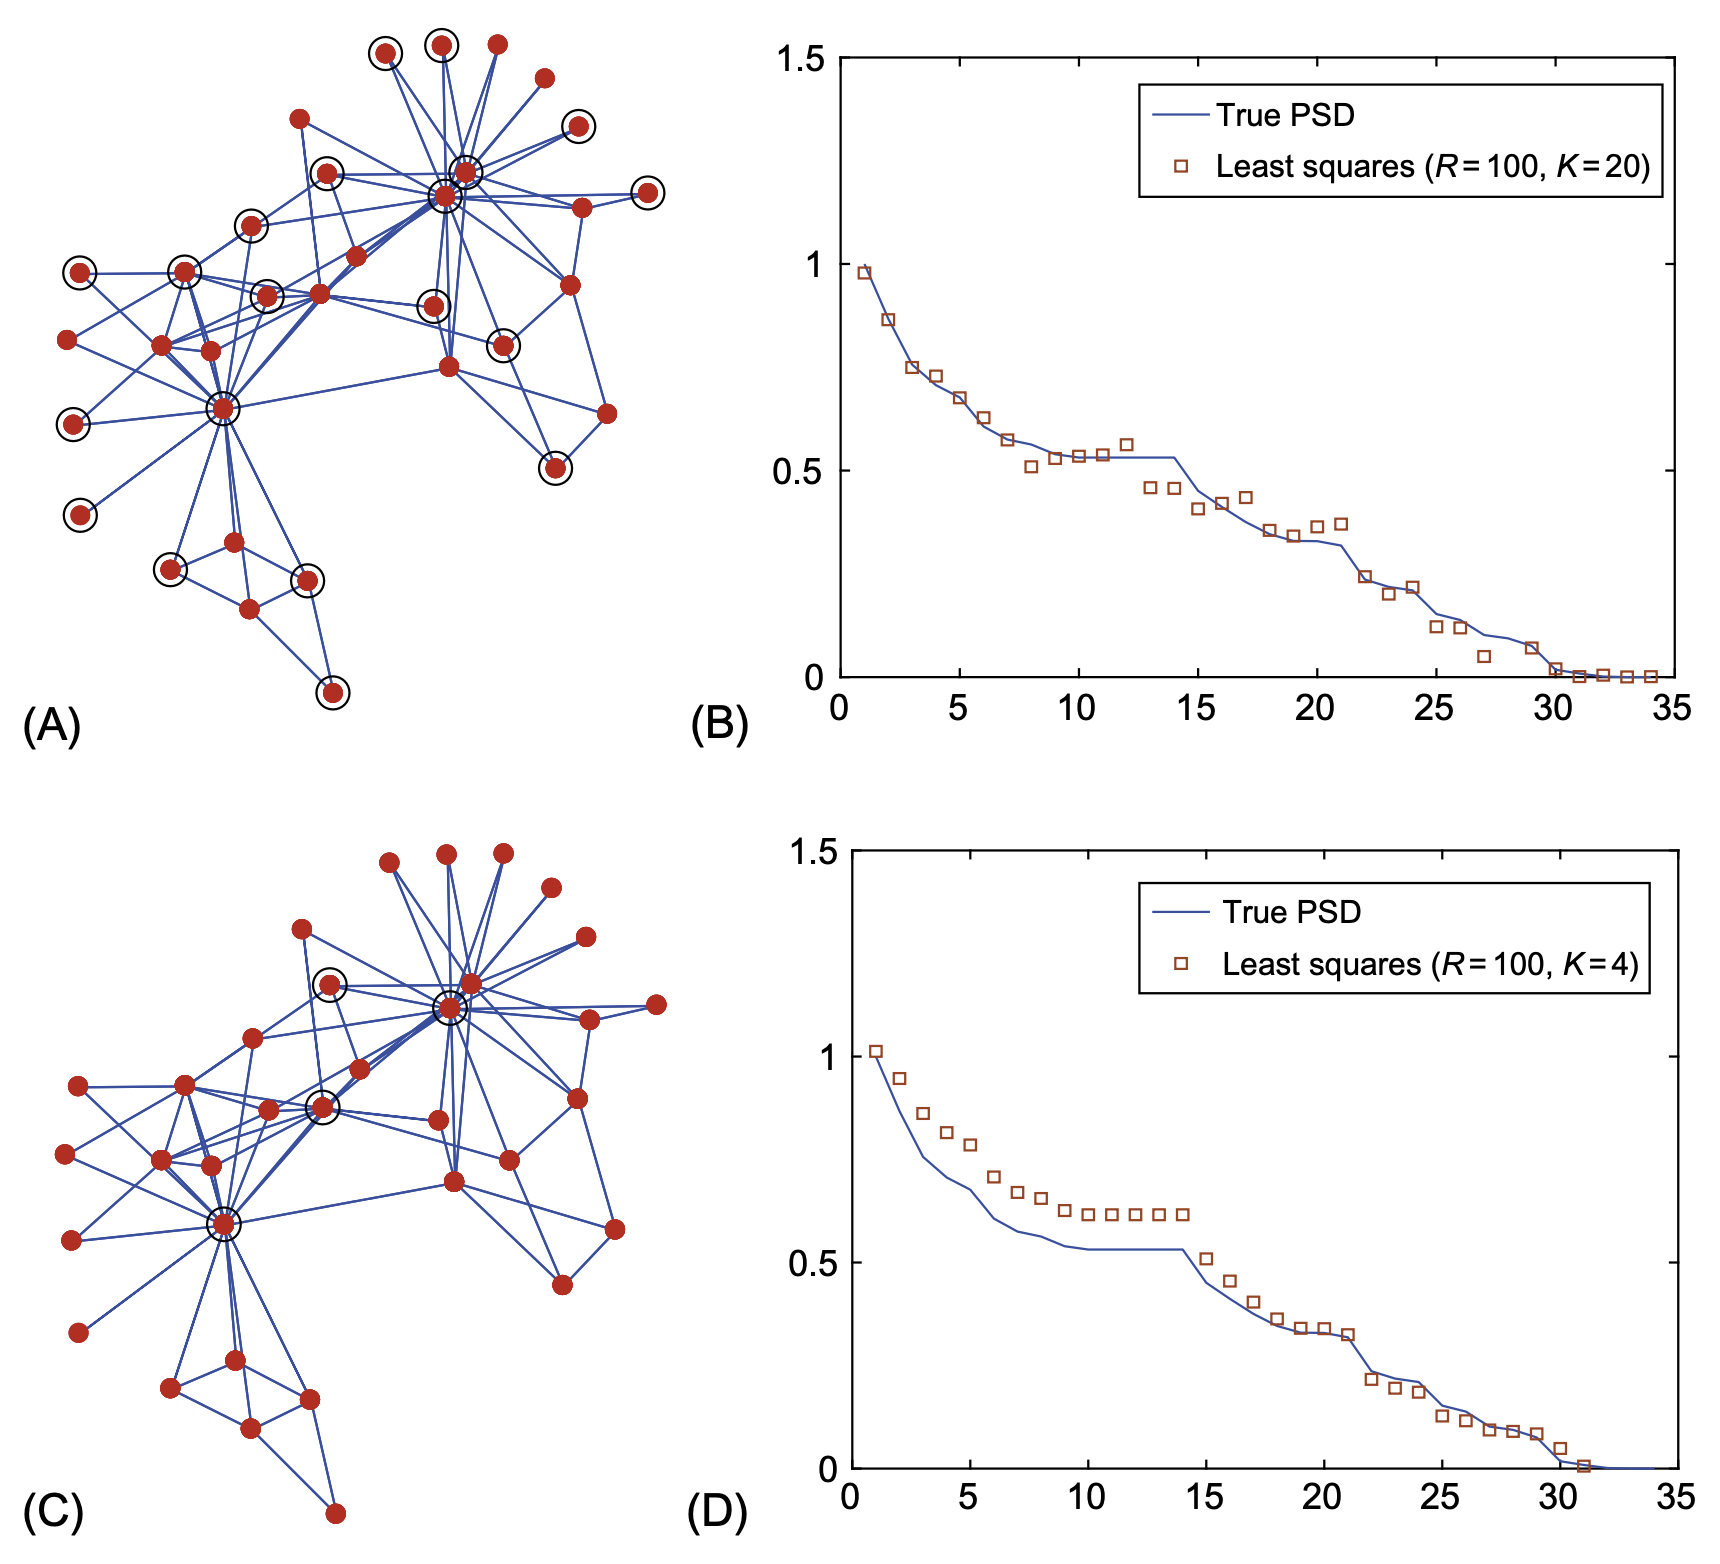

## Nonparametric PSD estimators

Nonparametric estimators—as opposed to their parametric counterparts—do not assume any specific generating model on the process ${\bf x}$. This more agnostic view of ${\bf x}$ comes with the price of needing, in general, to observe more graph signals to achieve satisfactory performance. In this section, we extend to the graph setting the periodogram, the correlogram, and the least-squares (LS) estimator, which are classical unbiased nonparametric estimators. Moreover, for the special case where the observations are Gaussian, we derive the Cramér-Rao lower bound. We also discuss the windowed average periodogram, which attains a better performance when a few observations are available by introducing bias in a controlled manner while drastically reducing the variance.


### Periodogram, correlogram, and LS estimator

From ${\bf C}_{\tilde{\bf x}}:= \mathbb{E}\left[\tilde{\bf x}\tilde{\bf x}^H \right]=\mathbb{E}\left[({\bf V}^H{\bf x})({\bf V}^H{\bf x})^H \right]=\text{diag}({\bf p})$ it follows that one may express the PSD as ${\bf p}=\mathbb{E}\left[|{\bf V}^H{\bf x}|^2\right]$. That is, the PSD is given by the expected value of the squared frequency components of the random process. This leads to a natural approach for the estimation of ${\bf p}$ from a finite set of $R$ realizations of the process ${\bf x}$. Indeed, we compute the ${\bf GFT} \tilde{\bf x}_r = {\bf V}^H{\bf x}_r$ of each observed signal ${\bf x}_r$ and estimate ${\bf p}$ as

$$
\hat{\bf p}_{pg}:= \frac{1}{R}\sum_{r=1}^R|\tilde{\bf x}_r|^2=\frac{1}{R}\sum_{r=1}^{R}|{\bf V}^H{\bf x}_{r}|^2.
$$

The estimator $\hat{\bf p}_{pg}$ is termed periodogram due to its evident similarity with its homonym^[동음이의어] in classical estimation. It is simple to show that ${\bf p}_{pg}$ is an unbiased estimator, that is, $\mathbb{E}[\hat{\bf p}_{pg}]= {\bf p}$. A more detailed analysis of the performance of $\hat{\bf p}_{pg}$, for the case where the observations are Gaussian, is given in Proposition 12.1.^[Proposition 12.1은 뒤에 다루는데 $\hat{\bf p}_{pg}$의 분산에 대한 서술이 있음. 분산은  $\mathbb{V}[\hat{\bf p}_{pg}]=\frac{2}{R}\text{diag}^2({\bf p})$와 같음]

An alternative nonparametric estimation scheme, denominated correlogram, can be devised by
starting from the definition of ${\bf p}$ in 

$${\bf p}:=\text{diag}\big({\bf V}^H {\bf C}_{\bf x}{\bf V} \big).$$ 

Namely, one may substitute ${\bf C}_{\bf x}$ in above equation by the sample covariance $\hat{\bf C}_{\bf x} = \frac{1}{R}\sum_{r=1}^R{\bf x}_r{\bf x}_r^H$ computed based on the available observations to obtain

$$\hat{\bf p}_{cg}:= \text{diag}\left({\bf V}^H \hat{\bf C}_{\bf x}{\bf V} \right):=\text{diag}\left[{\bf V}^H\big[ \frac{1}{R}\sum_{r=1}^R{\bf x}_r{\bf x}_r^H\big]{\bf V} \right].$$

Notice that the matrix ${\bf V}^H\hat{\bf C}_{\bf x}{\bf V}$ is in general, not diagonal because the eigenbasis of $\hat{\bf C}_{\bf x}$ differs from ${\bf V}$, the eigenbasis of ${\bf C}_{\bf x}$. Nonetheless, we keep only the diagonal elements ${\bf v}_i^H \hat{\bf C}_{\bf x}{\bf v}_i$ for $i = 1, \dots , N$ as our PSD estimator. It can be shown that the correlogram ${\bf p}_{cg}$ and the periodogram ${\bf p}_{pg}$ lead to identical estimators, as is the case in classical signal processing.



The correlogram can also be interpreted as an LS estimator. The decomposition in ${\bf C}_{\bf x}={\bf V}\text{diag}({\bf p}){\bf V}^H$ allows a linear parameterization of the covariance matrix ${\bf C}_{\bf x}$ as

$$ 
{\bf C}_{\bf x}({\bf p})=\sum_{i=1}^N p_i{\bf v}_i{\bf v}_i^H.
$$

This linear parametrization will also be useful for the sampling schemes developed in Section 12.4. Vectorizing ${\bf C}_{\bf x}$ in ${\bf C}_{\bf x}({\bf p})=\sum_{i=1}^N p_i{\bf v}_i{\bf v}_i^H$ results in a set of $N^2$ equations in ${\bf p}$ 

$$
{\bf c}_{\bf x} = \text{vec}({\bf C}_{\bf x})=\sum_{i=1}^{N}p_i \text{vec}({\bf v}_i{\bf v}_i^H)={\bf G}_{np}{\bf p},
$$

where $\text{vec}({\bf v}_i{\bf v}_i^H)={\bf v}_i^\ast \otimes {\bf v}_i$. Relying on the Khatri-Rao product, we then form the $N^2 \times N$ matrix ${\bf G}_{np}$ as 

$$
{\bf G}_{np}:= \left[{\bf v}_1^\ast \otimes {\bf v}_1, \dots, {\bf v}_N^\ast \otimes {\bf v}_N \right] = {\bf V}^\ast \odot {\bf V}.
$$


> Here $\otimes$ denote the Kronecker matrix product and $\odot$ denote the Khatri-Rao matrix product. 

Using the sample covariance matrix $\hat{\bf C}_{\bf x}$ as an estimate of ${\bf C}_{\bf x}$, we can *match* the estimated covariance vector $\hat{\bf c}_{\bf x}=\text{vec}(\hat{\bf C}_{\bf x})$ to the true covariance vector ${\bf c}_{\bf x}$ in the LS sense as 

$$
\hat{\bf p}_{ls} = \underset{\bf p}{\operatorname{argmin}} \|\hat{\bf c}_{\bf x}-{\bf G}_{np}{\bf p}\|_2^2=({\bf G}_{np}^H{\bf G}_{np})^{-1}{\bf G}_{np}^H\hat{\bf c}_{\bf x}.
$$

In other words, the LS estimator minimizes the squared error $\text{tr}\left[\big(\hat{\bf C}_{\bf x} − \hat{\bf C}_{\bf x}({\bf p})\big)^T \big(\hat{\bf C}_{\bf x} − \hat{\bf C}_{\bf x}({\bf p})\big)\right]$. From expression $\hat{\bf p}_{ls} = \underset{\bf p}{\operatorname{argmin}} \|\hat{\bf c}_{\bf x}-{\bf G}_{np}{\bf p}\|_2^2=({\bf G}_{np}^H{\bf G}_{np})^{-1}{\bf G}_{np}^H\hat{\bf c}_{\bf x}$ it can be shown that the $i$th element of $\hat{\bf p}_{ls}$ is ${\bf v}_i^H \hat{\bf C}_{\bf x} {\bf v}_i$. Combining this with Eq.


$$\hat{\bf p}_{cg}:= \text{diag}\left({\bf V}^H \hat{\bf C}_{\bf x}{\bf V} \right):=\text{diag}\left[{\bf V}^H\big[ \frac{1}{R}\sum_{r=1}^R{\bf x}_r{\bf x}_r^H\big]{\bf V} \right]$$

we get that the LS estimator $\hat{\bf p}_{ls}$ and the correlogram $\hat{\bf p}_{cg}$ —and hence the periodogram as well— are all identical estimators.
The estimators derived in this subsection do not assume any data distribution and are well suited for cases where the data probability density function is not available. In what follows, we provide performance bounds for these estimators under the condition that the observed signals are Gaussian.

# Summary 

## 정상시계열을 분석하는 두 가지 흐름, ACF와 PSD

### 전통적인 분석방법 

클래식한 정상시계열은 유한차수의 ARMA로 근사할 수 있음이 알려져 있다^[Wold's theorem]. 유한차수의 ARMA의 계수 $p$,$q$를 적절하게 추정하기 위해서는 시계열 ${\bf x}$를 SACF plot 혹은 SPACF plot 을 이용하면 된다. 이때 SACF 혹은 SPACF 의 그림을 살펴보고 적절한 모형을 선택하기 위해서는 유한차수 ARMA의 이론적 ACF의 모양을 알면 되는데,^[예를들어 "coef가 0.9인 AR(1)의 경우 lag=1 에 대한 이론적 ACF값이 0.9, lag=2에 대한 ACF값이 0.81, ... 와 같이 되더라~" 하는식의] 이를 바꾸어서 말하면 결국 정상시계열 ${\bf x}$의 모든 정보는 ACF에 들어있다는 의미가 된다. 즉 정상시계열은 ACF만 잘 추정하면 모든 것이 해결된다. 

그런데 ACF의 모든 정보는 다시 아래의 행렬에 들어있다. 

$${\bf C}_{\bf x}=\mathbb{E}[{\bf x}{\bf x}^T]$$

여기에서 ${\bf x}$는 realization이 아니라 확률벡터를 의미함을 유의하자.^[보통 수리통계에서는 확률변수를 $X$ realization을 $x$로 표현하지만 여기에서는 매트릭스를 대문자로 쓰고 있어서 그런식으로 표현하기 어렵다, 그래서 그때 그때 이것이 확률변수인지 realization인지 따져봐야 한다] 따라서 정상시계열의 경우 ${\bf C}_{\bf x}$를 잘 추정하면 모든것이 해결된다고 생각하면 된다. 

> 참고: 정상시계열의 경우 ACF 만 정확하게 알아도 (반대로 PACF만 정확하게 알아도) 이론상 모든 모형을 특정할 수 있다. 즉 정상시계열의 모형을 특정하기 위해서는 ACF plot, PACF plot 하나만 있어도 충분하다. (Wold's Thm은 떠올리면 모든 정상시계열은 무한MA로 유니크하게 표현할 수 있는데, 이는 PACF plot을 가지고 모든 정상시계열을 유니크하게 특정할 수 있다는 것을 의미한다) 다만 좀 더 모형을 특정하는 과정을 용이하게 하기 위해서 실전에서는 SACF plot 과 SPACF plot 을 함께 보는 것이 유리하다. 

**(예제) AR(1) 모형**

왜 ACF의 모든정보를 ${\bf C}_{\bf x}$로 부터 알수 있는지 코드를 통하여 실습하여 보자. (바로 이해된다면 사실 이 예제는 스킵해도 무방함) 아래와 같은 모형을 가정하자. 

$$x_{t} = 0.5 x_{t-1} +\epsilon_t$$

여기에서 $\epsilon_t$는 서로 독립인 표준정규분포를 따른다. 이 모형에서 길이가 100인 시계열을 임의로 발생시키자. 

In [438]:
x = zeros(100)
x[1] = randn()
for t in 2:100
    x[t] = 0.5*x[t-1] + randn()
end

모형에서 생성된 하나의 시계열을 시각화 하면 아래와 같다. 

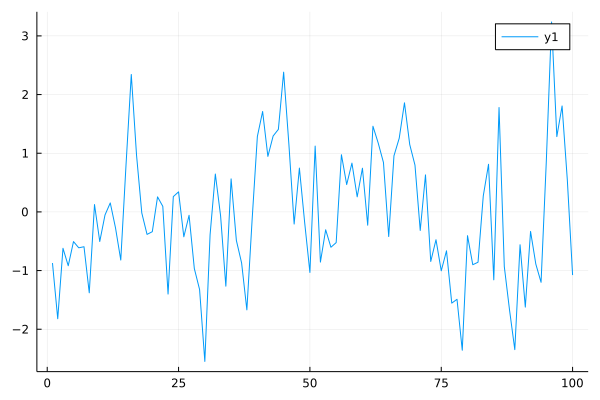

In [463]:
plot(x) # 그냥 그려본것임. 별 의미는 없음

**lag=1일 경우 이 시계열의 SACF를 계산하면 아래와 같다.**

In [464]:
x[1:99] .* x[2:100]

99-element Vector{Float64}:
  1.587897526021493
  1.130306190921068
  0.5698214432110668
  0.4648189302568683
  0.3099446153360606
  0.36362604534744775
  0.8191871414624922
 -0.1720390842292145
 -0.06301214708310766
  0.026414715508855904
 -0.007988283356933327
 -0.04178812545299474
  0.22453267567940685
  ⋮
  3.931333581073927
  1.315564948810858
  0.9096080102581454
  0.5410986320348997
  0.29627801400693676
  1.0673283524686212
 -1.0394649044573636
  2.80195248208142
  4.152973765526384
  2.316315764368524
  0.978758337765867
 -0.5840281943972468

- 이 계산결과는 각 $t$에 대하여 $x_{t-1}x_t$ 를 계산한 것과 같다. 

이 수열들의 평균은 아래와 같다. 

In [465]:
x[1:99] .* x[2:100] |> mean

0.5835563885014224

- 이 계산결과는 $\frac{1}{99}\sum_{t=2}^{100} x_{t-1}x_t$를 계산한 것과 같다. 

이론적인 값인 0.5 근처의 값이 잘 나옴을 알 수 있다. 

**lag=2일 경우도 마찬가지로 구할 수 있다.**

In [466]:
x[1:98] .* x[3:100] |> mean

0.38420263596668275

이러한 숫자들은 그런데 ${\bf x}{\bf x}^T$를 이용하여서도 구할 수 있다.^[참고로 여기에서 ${\bf x}$는 확률벡터가 아니라 realization을 의미함]

In [467]:
x*x'

100×100 Matrix{Float64}:
  0.760108    1.5879      0.541064   …  -1.57394    -0.472676    0.939172
  1.5879      3.31719     1.13031       -3.28802    -0.987441    1.96197
  0.541064    1.13031     0.385143      -1.12037    -0.336463    0.668527
  0.800507    1.67229     0.569821      -1.65759    -0.497799    0.989089
  0.441361    0.922022    0.314172      -0.913915   -0.274462    0.545336
  0.533784    1.1151      0.379961   …  -1.10529    -0.331936    0.659531
  0.517803    1.08171     0.368586      -1.0722     -0.321998    0.639786
  1.20252     2.51212     0.855987      -2.49003    -0.747794    1.48581
 -0.108745   -0.227173   -0.0774074      0.225175    0.0676234  -0.134363
  0.440444    0.920106    0.313519      -0.912016   -0.273892    0.544203
  0.0455859   0.0952309   0.0324492  …  -0.0943935  -0.0283478   0.0563249
 -0.133198   -0.278257   -0.0948139      0.27581     0.0828298  -0.164577
  0.238468    0.498169    0.169748      -0.493789   -0.148292    0.294646
  ⋮           

여기에서 각 원소들이 의미하는 바는 아래와 같다. 

- 대각선의 원소: $x_t^2,~ t=1,2,\dots,100$ 을 의미
- 대각선 한칸 위, 혹은 한칸 아래: $x_{t-1} x_t~ t=2,3,\dots,100$ 을 의미 
- 대각선 두칸 위, 혹은 두칸 아래: $x_{t-2} x_t~ t=3,4,\dots,100$ 을 의미 

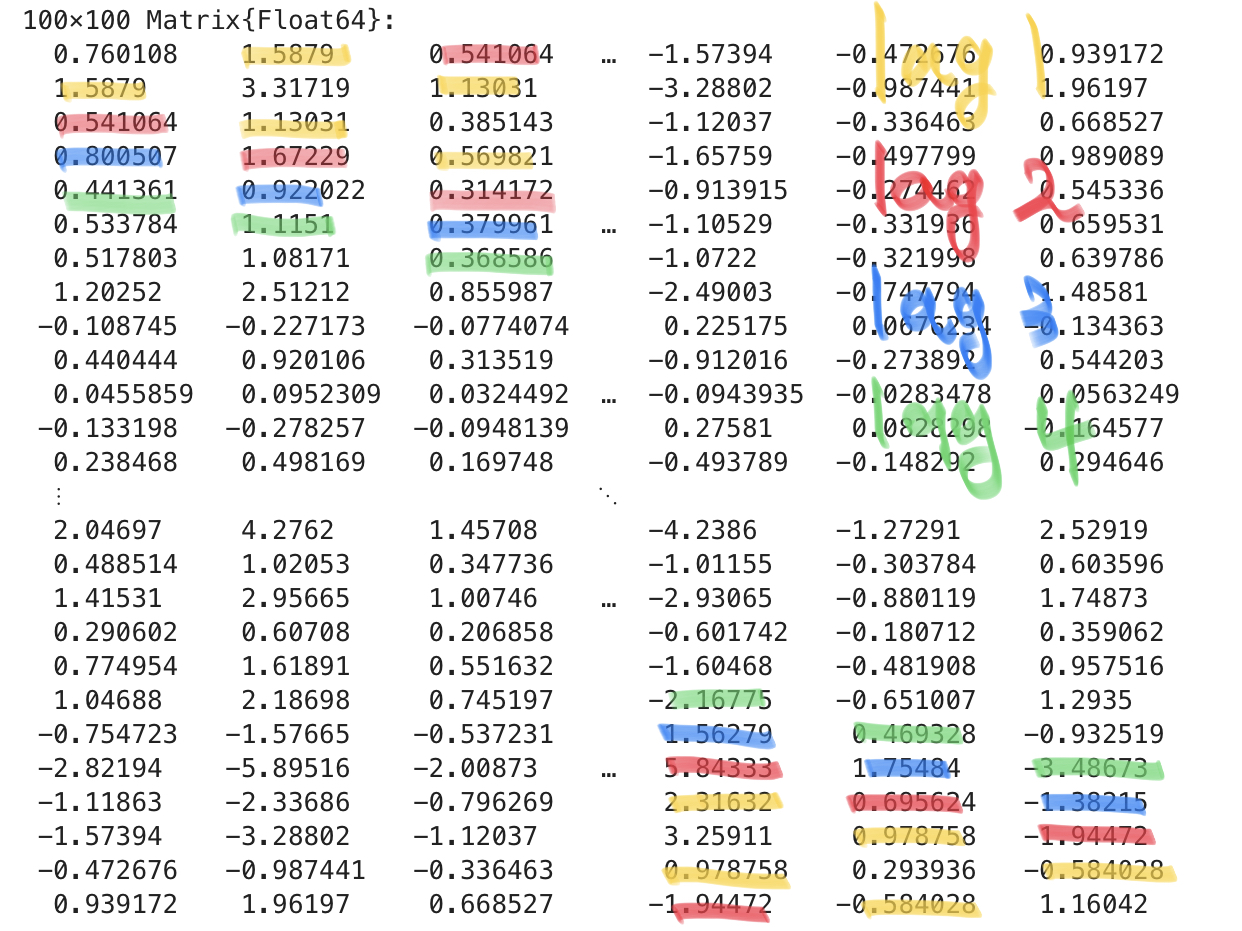

확인해보자. 

**lag=1, 스크린샷의 노란색**

In [456]:
(x[1:99] .* x[2:100])[1:5]

5-element Vector{Float64}:
 1.587897526021493
 1.130306190921068
 0.5698214432110668
 0.4648189302568683
 0.3099446153360606

- lag1에 해당하는 숫자들임. 이는 스크린샷에서 노란색으로 표현된 1.589, 1.13031, 0.569821 ... 등과 일치한다. 

**lag=2, 스크린샷의 빨간색**

In [468]:
(x[1:98] .* x[3:100])[1:5]

5-element Vector{Float64}:
 0.5410642277088621
 1.6722932576420804
 0.3141719983177106
 0.5621541352252872
 0.30066534927151267

- lag2에 해당하는 숫자들임. 이는 스크린샷에서 빨간색으로 표현된 숫자들인 0.54164, 1.67229, 0.31417 ... 등과 일치한다. 

### 스펙트럼 방법 

지금까지는 정상시계열일 경우 ACF를 이용한 간단한 분석방법을 다시 복습했다. 그리고 ${\bf C}_{\bf x}$가 ACF를 구함에 필요한 모든정보를 가지고 있음을 이해했다. 한편 ${\bf C}_{\bf x}$은 positive definite matrix 이므로 아래와 같이 분해가능하다. 

$${\bf C}_{\bf x} = {\bf V} \text{diag}({\bf p}) {\bf V}^H$$

이 수식표현을 잘 해석하면 ${\bf C}_{\bf x}$의 모든 정보는 ${\bf V}$와 ${\bf p}$에 담겨있다는 사실을 이해할 수 있다. 그런데 정상시계열일 경우 한정하여 ${\bf C}_{x}$의 고유벡터행렬은 ${\bf B}$의 고유벡터행렬과 일치한다는 사실을 알고 있다. 따라서 ${\bf V}$는 ${\bf B}$로 부터 그냥 알 수 있는 정보이다. 따라서 ${\bf C}_{\bf x}$의 모든 정보는 ${\bf p}$에 담겨있다는 사실을 알 수 있다. 이는 적절한 ${\bf p}$를 추정하는 일은 적절한 ${\bf C}_{\bf x}$를 추정하는 것과 같다는 사실을 알려준다. 

요약하면 아래와 같다. 

- 임의의 정상시계열은 이론적인 ACF (혹은 PACF)를 잘 추정하면 유니크하게 특정할 수 있다. (Wold's Thm) 
- ACF를 잘 추정한다는 말은 ${\bf C}_{\bf x}$를 잘 추정한다는 의미이다. 
- 그런데 ${\bf p}$를 잘 추정하면 ${\bf C}_{\bf x}$를 잘 추정하는 일이 된다. 
- 따라서 임의의 정상시계열은 ${\bf p}$를 잘 추정하면 유니크하게 특정할 수 있다는 결론을 얻는다. 

여기에서 ${\bf p}$를 power spectral density 라고 부른다. 일반적으로 정상시계열을 분석하기 위해서는 ${\bf C}_{\bf x}$를 특정하거나, ${\bf p}$를 특정하면 되는데 여기에서 ${\bf p}$를 특정한뒤 ${\bf p}$로 부터 ${\bf C}$를 역으로 해석하는 방법론을 spectral analysis라고 부른다. 경우에 따라서 ${\bf C}_{\bf x}$를 특정하는 것이 용이할 수도 있지만 ${\bf p}$를 특정하고 해석하는 것이 용이할 때도 있다. 

그렇다면 주어진 시계열 ${\bf x}$에 대하여 ${\bf p}$를 어떻게 구할까? 직관적으로 생각하면 단순히 아래의 알고리즘으로 구하면 된다는 것을 알 수 있다. 

1. ${\bf C}_{\bf x}$를 알아낸다. 
2. ${\bf C}_{\bf x}$를 고유분해하여 ${\bf p}$를 구한다. 

또 다른 방법으로는 교재에 소개된 바 있는 아래의 수식을 이용하는 것이다.^[이 수식이 성립하는 이유는 조금 손으로 써보면 금방 알 수 있음]

$${\bf p}=\mathbb{E}\left[|{\bf V}^H{\bf x}|^2\right]$$

이것을 이용하면 아래와 같은 알고리즘을 떠올릴 수 있다. 

1. ${\bf B}$의 고유벡터행렬 ${\bf V}$를 구하고 ${\bf V}^H{\bf x}$를 계산한다. 
2. 계산된 결과를 원소별로 제곱하여 ${\bf p}$를 얻는다. 

그런데 ${\bf V}^H{\bf x}= {\bf DFT} \cdot {\bf x}$ 이므로 1의 과정을 아래와 같이 바꾸어 서술할 수 있다. 

1. ${\bf x}$를 퓨리에변환하여 $\tilde{\bf x} = {\bf DFT} \cdot {\bf x}$ 를 계산한다. 
2. $\tilde{\bf x}$를 원소별로 제곱하여 ${\bf p}$를 얻는다. 

즉 임의의 시계열을 퓨리에변환한 뒤 제곱하면 ${\bf p}$를 얻을 수 있다. 

**(예제2) -- 하나의 realization에서 $\hat{\bf p}$를 구해보자.**

(예제1에 이어서) 아래의 모형에서 생성된 ${\bf x}$를 다시 고려하자. 

$$x_{t} = 0.5 x_{t-1} +\epsilon_t$$

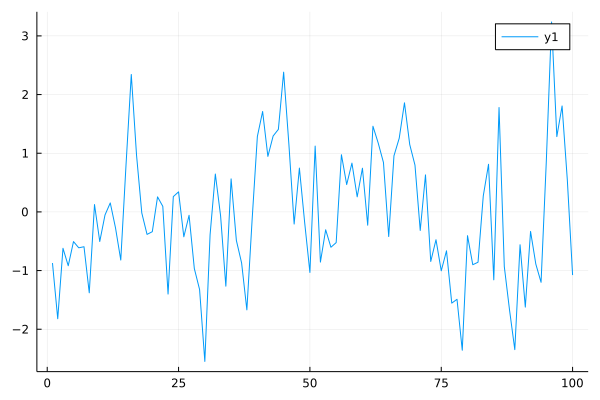

In [476]:
plot(x)

이 자료의 PSD ${\bf p}$는 아래와 같이 구할 수 있다. 

**단계1**: ${\bf x}$의 DFT를 계산

In [494]:
x̃ = fft(x) 

100-element Vector{ComplexF64}:
  -5.756917285643583 + 0.0im
   -19.0826720904921 - 1.0178306444775302im
  14.230506824768984 - 11.867854578089997im
  3.8980118254428726 + 1.2603018602424614im
 -16.157973053188194 + 27.488246322270918im
   12.32574209329046 - 1.5134316695905219im
    3.95421224972561 + 15.369129638224624im
   9.516938110507798 + 19.371467179753544im
  -19.38292930624831 + 9.49506288623419im
  -7.853934851478428 + 4.134711886071571im
 -14.072349901900408 - 5.945064076174294im
 -14.596266922162355 + 3.447776409279256im
   5.857720447482927 + 5.738895112838594im
                     ⋮
   5.857720447482924 - 5.738895112838594im
 -14.596266922162352 - 3.4477764092792564im
 -14.072349901900408 + 5.945064076174294im
   -7.85393485147843 - 4.134711886071569im
 -19.382929306248315 - 9.49506288623419im
   9.516938110507798 - 19.37146717975354im
  3.9542122497256105 - 15.36912963822462im
  12.325742093290458 + 1.5134316695905206im
 -16.157973053188194 - 27.488246322270925im
  3.8

- ${\bf B}$를 설정하고 고유값분해 하기 귀찮아서 그냥 DFT해주는 패키지 사용함 

**단계2**: $\hat{\bf p}$를 계산

In [498]:
p̂ = abs.(x̃).^2

100-element Vector{Float64}:
   33.14209663374188
  365.18435333408365
  343.3532967764883
   16.782856970223087
 1016.6837790613963
  154.21439356883184
  251.84594035243464
  465.8258516955045
  465.85416770456163
   78.78013503208902
  233.37481863133453
  224.93817023139349
   67.24780595702228
    ⋮
   67.24780595702225
  224.93817023139337
  233.37481863133453
   78.78013503208902
  465.8541677045618
  465.8258516955044
  251.84594035243452
  154.2143935688318
 1016.6837790613968
   16.782856970223072
  343.3532967764882
  365.1843533340838

***참고***

`fft(x)` 대신에 아래의 코드를 이용해도 된다. 

In [554]:
N = 100 
V = [i*j for i in 0:(N-1) for j in 0:(N-1)] |> 
    x -> reshape(x,(N,N)) .|> 
    x -> exp(im * (2π/N) * x)
V'x

100-element Vector{ComplexF64}:
  -5.756917285643587 + 0.0im
 -19.082672090492103 - 1.0178306444775291im
   14.23050682476898 - 11.867854578090007im
  3.8980118254428824 + 1.2603018602424476im
  -16.15797305318818 + 27.48824632227092im
   12.32574209329044 - 1.5134316695905325im
  3.9542122497256385 + 15.369129638224617im
    9.51693811050782 + 19.371467179753516im
  -19.38292930624826 + 9.495062886234233im
 -7.8539348514784155 + 4.134711886071595im
 -14.072349901900417 - 5.945064076174276im
 -14.596266922162371 + 3.447776409279244im
   5.857720447482956 + 5.7388951128385735im
                     ⋮
   5.857720447482839 - 5.738895112838781im
 -14.596266922162307 - 3.4477764092792627im
  -14.07234990190023 + 5.945064076174198im
  -7.853934851478599 - 4.134711886071242im
 -19.382929306248577 - 9.49506288623372im
   9.516938110507212 - 19.371467179753736im
  3.9542122497250025 - 15.369129638224603im
  12.325742093290597 + 1.5134316695903638im
  -16.15797305318867 - 27.488246322270854im
  

진짜 똑같은지 확인

In [555]:
fft(x)

100-element Vector{ComplexF64}:
  -5.756917285643583 + 0.0im
   -19.0826720904921 - 1.0178306444775302im
  14.230506824768984 - 11.867854578089997im
  3.8980118254428726 + 1.2603018602424614im
 -16.157973053188194 + 27.488246322270918im
   12.32574209329046 - 1.5134316695905219im
    3.95421224972561 + 15.369129638224624im
   9.516938110507798 + 19.371467179753544im
  -19.38292930624831 + 9.49506288623419im
  -7.853934851478428 + 4.134711886071571im
 -14.072349901900408 - 5.945064076174294im
 -14.596266922162355 + 3.447776409279256im
   5.857720447482927 + 5.738895112838594im
                     ⋮
   5.857720447482924 - 5.738895112838594im
 -14.596266922162352 - 3.4477764092792564im
 -14.072349901900408 + 5.945064076174294im
   -7.85393485147843 - 4.134711886071569im
 -19.382929306248315 - 9.49506288623419im
   9.516938110507798 - 19.37146717975354im
  3.9542122497256105 - 15.36912963822462im
  12.325742093290458 + 1.5134316695905206im
 -16.157973053188194 - 27.488246322270925im
  3.8

### 전통적인 방법과 스펙트럼 방법의 비교 

시계열자료의 전통적인 분석과 spectral analysis는 대충 아래의 과정으로 비교 설명할 수 있다. 

|단계|전통적인 방법|스펙트럴 분석|
|:-:|:-:|:-:|
|1| ${\bf x}$의 plot을 그려봄 | ${\bf x}$의 plot을 그려봄| 
|2| SACF plot, SPACF plot 을 그려봄 | PSD plot을 그려봄 | 
|3| ACF를 추정 (=ARMA($p$,$q$)에 대응하는 파라메터를 추정) | ${\bf p}$를 추정 | 
|4| 추정된 파라메터를 바탕으로 여러가지 분석 수행 | 추정된 파라메터를 바탕으로 여러가지 분석 수행 | 

눈여겨 볼 점은 PSD plot의 존재이다. 전통적인 시계열에서 SACF plot 과 비슷하게 스펙트럼 방법에서 시계열을 분석하기 위해 필요한 매우 중요한 시각화 이다. 간단하게 비교를 하면 아래와 같다. 

**SACF plot**

- x축: lag=0, lag=1, ....
- y축: lag에 대응하는 상관계수값 

**PSD plot**

- x축: $\Omega=\big\{\frac{k}{N}:~ \text{for}~ k=0,\dots, N-1\big\}$, 정규화된 freq를 의미함 
- y축: 주파수에 대응하는 power값

전통적인 방법에 비하여 스펙트럴 분석이 가지는 장점은 위의 표에서 소개한 일반적인 분석루틴이 시계열이 아닌 그래프신호로 쉽게 확장가능 하다는 점이다^[퓨리에 변환대신에 그래프 퓨리에 변환을 이용하기만 하면된다]. 따라서 앞으로는 전통적인 시계열 분석방법 대신 스펙트럴 분석만을 다룰 것이다. 스펙트럴 분석의 핵심적인 부분은 ${\bf p}$를 추정하는 방법과 추정량의 점근적 성질들을 파악하는 것이다. 이 포스트에서는 ${\bf p}$를 추정하는 방법만을 다룬다. 

## 그래프신호에서의 PSD의 추정

이제 그래프 신호에서 ${\bf p}$를 추정하는 방법에 대하여 살펴보자. 그래프이동변환 (Graph Shift Operator, GSO)^[Back shift operator의 일반화 버전] ${\bf S}={\bf V}{\bf \Lambda}{\bf V}^H$에 대하여 정상인 시계열 ${\bf x}$를 고려한다. 이 신호의 그래프퓨리에 변환^[좀 더 정확하게는 ${\bf V}^H$ 에 대한 그래프 변환이라고 한다]은 아래와 같이 구할 수 있다. 

$$\tilde{\bf x}={\bf GFT} {\bf x} = {\bf V}^H{\bf x}$$

여기에서 $\tilde{\bf x}$를 ${\bf x}$의 주파수응답(frequency representation)이라고 부른다.^[이 $\tilde{\bf x}$를 그냥 graph Fourier transform이라고 부르는 사람도 많다. 즉 그래프퓨리에변환이 (1) 변환매트릭스 ${\bf GFT}$자체를 지칭할때도 있고 (2) 트랜스폼된 결과 $\tilde{\bf x}$를 지칭할때도 있음. 교재에서는 변환은 graph Fourier transform, 그리고 변환된 결과는 ${\bf x}$의 주파수응답이라고 한다.] 우리는 아래의 수식에서 ${\bf p}$의 값에 관심이 있다. 

$${\bf C}_{\bf x}={\bf V} \text{diag}({\bf p}){\bf V}^H$$

여기에서 ${\bf p}$를 PSD (power spectrum density) 라고 한다. ${\bf p}$가 포함된 표현식은 위의 수식 이외에도 2개가 더 있다. 이를 모두 요약하면 아래와 같다^[약간의 계산을 통하면 1,2,3이 쉽게 같은 수식임을 알 수 있음]


1. ${\bf C}_{\bf x}={\bf V} \text{diag}({\bf p}){\bf V}^H$^[이 수식을 살짝 정리하면 ${\bf p}=\text{diag}\big({\bf V}^H {\bf C}_{\bf x}{\bf V} \big)$ 와 같이 보다 예쁜 수식을 얻을 수 있음]
2. ${\bf p}=\mathbb{E}\left[|{\bf V}^H{\bf x}|^2\right]$
3. ${\bf c}_{\bf x} = \sum_{i=1}^{N}p_i \text{vec}({\bf v}_i{\bf v}_i^H) = {\bf G}_{np} {\bf p}$

위의 표현중 3.에서 ${\bf c}_{\bf x}$은 ${\bf C}_x$를 벡터화한 것이며 ${\bf G}_{np}$는 ${\bf V}^\ast$ 와 ${\bf V}$를 열별-크로네커곱 (column-wise Kronecker product) 이다. 이때 ${\bf G}_{np}$의 정의가 조금 생소하니 한번 계산하여 보자. 

(예제) 아래와 같은 GSO ${\bf B}$를 고려하자. 

In [280]:
B= [0 1 0 0 
    0 0 1 0 
    0 0 0 1 
    1 0 0 0]

4×4 Matrix{Int64}:
 0  1  0  0
 0  0  1  0
 0  0  0  1
 1  0  0  0

이러한 GSO에 대하여 ${\bf G}_{np}$는 아래와 같이 구할 수 있다. 

`(1)` ${\bf V}$를 정의 

In [534]:
V = [i*j for i in 0:3 for j in 0:3] |> 
    x -> reshape(x,(4,4)) .|> 
    x -> exp(im * (2π/4) * x) 

4×4 Matrix{ComplexF64}:
 1.0+0.0im           1.0+0.0im          …           1.0+0.0im
 1.0+0.0im   6.12323e-17+1.0im             -1.83697e-16-1.0im
 1.0+0.0im          -1.0+1.22465e-16im             -1.0+3.67394e-16im
 1.0+0.0im  -1.83697e-16-1.0im              5.51091e-16+1.0im

`(2)` ${\bf G}_{np}={\bf V}^{\ast} \odot {\bf V}$, 여기에서 $\odot$은 열별-크로네커곱을 의미한다. 

In [535]:
# columnwise_kron은 위에서 정의한적 있음~
Gₙₚ = columnwise_kron(conj(V),V)

16×4 Matrix{ComplexF64}:
 1.0+0.0im           1.0+0.0im          …           1.0+0.0im
 1.0+0.0im   6.12323e-17+1.0im             -1.83697e-16-1.0im
 1.0+0.0im          -1.0+1.22465e-16im             -1.0+3.67394e-16im
 1.0+0.0im  -1.83697e-16-1.0im              5.51091e-16+1.0im
 1.0+0.0im   6.12323e-17-1.0im             -1.83697e-16+1.0im
 1.0+0.0im           1.0+0.0im          …           1.0+0.0im
 1.0+0.0im   6.12323e-17+1.0im             -1.83697e-16-1.0im
 1.0+0.0im          -1.0+1.22465e-16im             -1.0+3.67394e-16im
 1.0+0.0im          -1.0-1.22465e-16im             -1.0-3.67394e-16im
 1.0+0.0im   6.12323e-17-1.0im             -1.83697e-16+1.0im
 1.0+0.0im           1.0+0.0im          …           1.0+0.0im
 1.0+0.0im   6.12323e-17+1.0im             -1.83697e-16-1.0im
 1.0+0.0im  -1.83697e-16+1.0im              5.51091e-16-1.0im
 1.0+0.0im          -1.0-1.22465e-16im             -1.0-3.67394e-16im
 1.0+0.0im   6.12323e-17-1.0im             -1.83697e-16+1.0im
 1.0+0.0im   

위에서 언급한 표현식 1,2,3 을 이용하면 ${\bf p}$를 추정하는 세 가지 방법을 각각 정의할 수 있다. 하나씩 살펴보자. 

### 1. ${\bf C}_{\bf x}={\bf V} \text{diag}({\bf p}){\bf V}^H$


확률과정 ${\bf x}$에서 $R$개의 realization $\{{\bf x}_1 \dots {\bf x}_R\}$ 을 관측하였다고 하자. 수식 ${\bf C}_{\bf x}={\bf V} \text{diag}({\bf p}){\bf V}^H$를 적당히 변형하면 아래를 얻을 수 있다. 

$${\bf p}=\text{diag}\big({\bf V}^H {\bf C}_{\bf x}{\bf V} \big)$$

여기에서 

$${\bf C}_{\bf x}=\mathbb{E}[{\bf x}{\bf x}^H]\approx \frac{1}{R}\sum_{r=1}^R{\bf x}_t{\bf x}_r^H$$

이므로 이 수식에 근거하여 ${\bf p}$을 추정한다면 아래와 같이 할 수 있다. 

$$\hat{\bf p}_{cg}:= \text{diag}\left({\bf V}^H \hat{\bf C}_{\bf x}{\bf V} \right):=\text{diag}\left[{\bf V}^H\big[ \frac{1}{R}\sum_{r=1}^R{\bf x}_r{\bf x}_r^H\big]{\bf V} \right].$$

만약에 확률과정 ${\bf x}$에서 관측한 시계열이 ${\bf x}_r$ 하나라면^[대부분은 관측한 시계열이 하나겠지..], 즉 $R=1$ 이라면 단순히 아래와 같이 쓸 수 있다. 

$$\hat{\bf p}_{cg}:= \text{diag}\left({\bf V}^H \hat{\bf C}_{\bf x}{\bf V} \right):=\text{diag}\left[{\bf V}^H{\bf x}_r{\bf x}_r^H{\bf V} \right].$$

> 주의: 여기에서 ${\bf V}^H {\bf C}_{\bf x}{\bf V}$ 는 항상 대각행렬이지만 ${\bf V}^H \hat{\bf C}_{\bf x}{\bf V}$ 은 대각행렬이 아닐수도 있음을 유의하자. 즉 이론적인 모수는 대각행렬이지만 sample version은 대각행렬이 아닐 수 있다. 대각선이 아닌 원소는 버리면 된다.)

> 아이디어: 혹시 대각선이 아닌 원소들을 이용하여 오차항 $\epsilon_t$의 분산을 추정할 수도 있지 않을까? 이미 연구가 있겠지? 

(예제)

In [549]:
N = 100 
V = [i*j for i in 0:(N-1) for j in 0:(N-1)] |> 
    x -> reshape(x,(N,N)) .|> 
    x -> exp(im * (2π/N) * x)

100×100 Matrix{ComplexF64}:
 1.0+0.0im       1.0+0.0im        …       1.0+0.0im
 1.0+0.0im  0.998027+0.0627905im     0.998027-0.0627905im
 1.0+0.0im  0.992115+0.125333im      0.992115-0.125333im
 1.0+0.0im  0.982287+0.187381im      0.982287-0.187381im
 1.0+0.0im  0.968583+0.24869im       0.968583-0.24869im
 1.0+0.0im  0.951057+0.309017im   …  0.951057-0.309017im
 1.0+0.0im  0.929776+0.368125im      0.929776-0.368125im
 1.0+0.0im  0.904827+0.425779im      0.904827-0.425779im
 1.0+0.0im  0.876307+0.481754im      0.876307-0.481754im
 1.0+0.0im  0.844328+0.535827im      0.844328-0.535827im
 1.0+0.0im  0.809017+0.587785im   …  0.809017-0.587785im
 1.0+0.0im  0.770513+0.637424im      0.770513-0.637424im
 1.0+0.0im  0.728969+0.684547im      0.728969-0.684547im
    ⋮                             ⋱  
 1.0+0.0im  0.728969-0.684547im      0.728969+0.684547im
 1.0+0.0im  0.770513-0.637424im      0.770513+0.637424im
 1.0+0.0im  0.809017-0.587785im   …  0.809017+0.587785im
 1.0+0.0im  0.844328-0.5358

In [556]:
p̂ = diag(V' * (x*x') * V)

100-element Vector{ComplexF64}:
 33.142096633741986 + 0.0im
 365.18435333408354 + 1.5376069362644531e-13im
  343.3532967764883 + 6.904176529646917e-14im
 16.782856970223083 - 3.5538396658301444e-14im
 1016.6837790613963 + 5.475049904926759e-15im
 154.21439356883144 + 6.4512443306088e-14im
  251.8459403524346 + 2.1316282072803006e-14im
 465.82585169550384 + 1.816929057526117e-13im
 465.85416770456044 + 4.1584439183295984e-14im
    78.780135032089 + 1.3472456770553478e-14im
 233.37481863133462 + 6.315728724701355e-14im
 224.93817023139385 - 3.472109560086835e-14im
  67.24780595702241 + 7.105427357601002e-14im
                    ⋮
   67.2478059570233 + 6.384723798533952e-14im
 224.93817023139195 + 1.9727655769954595e-14im
 233.37481863132837 - 2.1872689567834747e-14im
    78.780135032089 + 1.917599080404094e-14im
 465.85416770456294 + 4.808950231511622e-14im
 465.82585169550094 - 4.890486289860305e-14im
  251.8459403524291 + 2.0146681724568905e-14im
  154.2143935688347 - 1.09485969676175

### 2. ${\bf p}=\mathbb{E}\left[|{\bf V}^H{\bf x}|^2\right]$ 

확률과정 ${\bf x}$에서 $R$개의 realization $\{{\bf x}_1 \dots {\bf x}_R\}$ 을 관측하였다고 하자. 아래의 수식을 관찰하자. 

$${\bf p}=\mathbb{E}\left[|{\bf V}^H{\bf x}|^2\right]\approx \frac{1}{R}\sum_{r=1}^{R} |{\bf V}^H {\bf x}_r|^2 $$ 

따라서 $\frac{1}{R}\sum_{r=1}^{R} |{\bf V}^H {\bf x}_r|^2$ 를 PSD ${\bf p}$에 대한 추정량이라고 생각할 수 있다. 이러한 추정량을 기호로 $\hat{\bf p}_{pg}$라고 정의하고 periodogram이라고 부른다. 즉 

$$\hat{\bf p}_{pg}=\frac{1}{R}\sum_{r=1}^{R} |{\bf V}^H {\bf x}_r|^2 $$ 

만약에 확률과정 ${\bf x}$에서 관측한 시계열이 ${\bf x}_r$ 하나라면, 즉 $R=1$ 이라면 단순히 아래와 같이 쓸 수 있다. 

$$\hat{\bf p}_{pg}=|{\bf V}^H {\bf x}_r|^2 $$ 

즉 이 경우 $\hat{\bf p}_{pg}$는 단순히 관측시계열 ${\bf x}_r$의 그래프 퓨리에 변환 $\tilde{\bf x}={\bf V}^H{\bf x}_r$ 결과에 절대값을 취하고 제곱한 것과 같다. 

(예제)

스펙트럼방법챕터 예제2에서 이미 보여준 적 있다. 주어진 시계열 ${\bf x}$에 대하여 $\hat{\bf p}_{pg}$를 구하는 방법을 요약하면 아래와 같다. 

In [504]:
x̃ = fft(x) # 단계1: GFT, 이 신호는 시계열이라서 GFT대신에 DFT를 써도 된다.
p̂ = abs.(x̃).^2 # 단계2: hat p

100-element Vector{Float64}:
   33.14209663374188
  365.18435333408365
  343.3532967764883
   16.782856970223087
 1016.6837790613963
  154.21439356883184
  251.84594035243464
  465.8258516955045
  465.85416770456163
   78.78013503208902
  233.37481863133453
  224.93817023139349
   67.24780595702228
    ⋮
   67.24780595702225
  224.93817023139337
  233.37481863133453
   78.78013503208902
  465.8541677045618
  465.8258516955044
  251.84594035243452
  154.2143935688318
 1016.6837790613968
   16.782856970223072
  343.3532967764882
  365.1843533340838

### 3. ${\bf c}_{\bf x} = {\bf G}_{np} {\bf p}$

확률과정 ${\bf x}$에서 $R$개의 realization $\{{\bf x}_1 \dots {\bf x}_R\}$ 을 관측하였다고 하자. 아래의 수식을 관찰하자. 

$${\bf C}_{\bf x} = {\bf V} \text{diag}({\bf p}) {\bf V}^H$$

이 수식으로부터 아래를 얻을 수 있다. 

$${\bf c}_{\bf x} = \sum_{i=1}^{N}p_i \text{vec}({\bf v}_i{\bf v}_i^H) = {\bf G}_{np} {\bf p}$$

여기에서 ${\bf c}_{\bf x}$ 대신에 $\hat{\bf c}_{\bf x}$ 를 대입하면 아래와 같이 생각할 수 있다.

$$\hat{\bf c}_{\bf x} \approx  {\bf G}_{np} {\bf p}$$

이 문제는 아래와 같은 회귀모형으로 생각할 수 있다. 

||회귀모형|우리의 문제|
|:-:|:-:|:-:|
|모형|${\bf y} \approx {\bf X}{\boldsymbol \beta}$|$\hat{\bf c}_{\bf x} \approx {\bf G}_{np}{\bf p}$ |
|설명변수|${\bf X}$^[(n,p) matrix] | ${\bf G}_{np}$^[(N²,N) matrix]| 
|반응변수|${\bf y}$^[(n,1) col-vector] | $\hat{\bf c}_{\bf x}$^[(N²,1) col-vector]| 
|추정하고 싶은 파라메터|${\boldsymbol \beta}$^[(p,1) col-vector] | $\hat{\bf p}$^[(N,1) col-vector]| 
|오차항| 대부분 정규분포를 가정 | ??? 모르겠는데?? | 

회귀분석에서 아래의 수식이 익숙하다면 

$$
\hat{\boldsymbol \beta}_{ls} = \underset{\boldsymbol \beta}{\operatorname{argmin}} \|{\bf y}-{\bf X}{\boldsymbol \beta}\|_2^2=({\bf X}^T{\bf X})^{-1}{\bf X}^T{\bf y}.
$$


${\bf p}$를 추정하기 위한 아래의 수식도 쉽게 이해할 수 있다. (의문: 그런데 왜 MSE를 손실함수로 쓰고 있는 거야? 오차항이 설마 정규분포?)

$$
\hat{\bf p}_{ls} = \underset{\bf p}{\operatorname{argmin}} \|\hat{\bf c}_{\bf x}-{\bf G}_{np}{\bf p}\|_2^2=({\bf G}_{np}^H{\bf G}_{np})^{-1}{\bf G}_{np}^H\hat{\bf c}_{\bf x}.
$$


**(예제)**

`(1)` ${\bf V}$를 정의 

In [566]:
N = 100 
V = [i*j for i in 0:(N-1) for j in 0:(N-1)] |> 
    x -> reshape(x,(N,N)) .|> 
    x -> exp(im * (2π/N) * x)

100×100 Matrix{ComplexF64}:
 1.0+0.0im       1.0+0.0im        …       1.0+0.0im
 1.0+0.0im  0.998027+0.0627905im     0.998027-0.0627905im
 1.0+0.0im  0.992115+0.125333im      0.992115-0.125333im
 1.0+0.0im  0.982287+0.187381im      0.982287-0.187381im
 1.0+0.0im  0.968583+0.24869im       0.968583-0.24869im
 1.0+0.0im  0.951057+0.309017im   …  0.951057-0.309017im
 1.0+0.0im  0.929776+0.368125im      0.929776-0.368125im
 1.0+0.0im  0.904827+0.425779im      0.904827-0.425779im
 1.0+0.0im  0.876307+0.481754im      0.876307-0.481754im
 1.0+0.0im  0.844328+0.535827im      0.844328-0.535827im
 1.0+0.0im  0.809017+0.587785im   …  0.809017-0.587785im
 1.0+0.0im  0.770513+0.637424im      0.770513-0.637424im
 1.0+0.0im  0.728969+0.684547im      0.728969-0.684547im
    ⋮                             ⋱  
 1.0+0.0im  0.728969-0.684547im      0.728969+0.684547im
 1.0+0.0im  0.770513-0.637424im      0.770513+0.637424im
 1.0+0.0im  0.809017-0.587785im   …  0.809017+0.587785im
 1.0+0.0im  0.844328-0.5358

`(2)` ${\bf G}_{np}={\bf V}^{\ast} \odot {\bf V}$, 여기에서 $\odot$은 열별-크로네커곱을 의미한다. 

In [567]:
# columnwise_kron은 위에서 정의한적 있음~
Gₙₚ = columnwise_kron(conj(V),V)

10000×100 Matrix{ComplexF64}:
 1.0+0.0im       1.0+0.0im        …       1.0+0.0im
 1.0+0.0im  0.998027+0.0627905im     0.998027-0.0627905im
 1.0+0.0im  0.992115+0.125333im      0.992115-0.125333im
 1.0+0.0im  0.982287+0.187381im      0.982287-0.187381im
 1.0+0.0im  0.968583+0.24869im       0.968583-0.24869im
 1.0+0.0im  0.951057+0.309017im   …  0.951057-0.309017im
 1.0+0.0im  0.929776+0.368125im      0.929776-0.368125im
 1.0+0.0im  0.904827+0.425779im      0.904827-0.425779im
 1.0+0.0im  0.876307+0.481754im      0.876307-0.481754im
 1.0+0.0im  0.844328+0.535827im      0.844328-0.535827im
 1.0+0.0im  0.809017+0.587785im   …  0.809017-0.587785im
 1.0+0.0im  0.770513+0.637424im      0.770513-0.637424im
 1.0+0.0im  0.728969+0.684547im      0.728969-0.684547im
    ⋮                             ⋱  
 1.0+0.0im  0.770513-0.637424im      0.770513+0.637424im
 1.0+0.0im  0.809017-0.587785im      0.809017+0.587785im
 1.0+0.0im  0.844328-0.535827im   …  0.844328+0.535827im
 1.0+0.0im  0.876307-0.48

`(3)` $\hat{\bf p}_{ls}=({\bf G}_{np}^H{\bf G}_{np})^{-1}{\bf G}_{np}^H\hat{\bf c}_{\bf x}$

In [572]:
ĉₓ = vec(x*x')
p̂ = inv(Gₙₚ' * Gₙₚ) * Gₙₚ' * ĉₓ 

100-element Vector{ComplexF64}:
  0.003314209663374193 - 2.7356277964988863e-19im
   0.03651843533340838 - 4.01518191768058e-18im
   0.03433532967764885 + 2.515448157755484e-17im
 0.0016782856970223292 - 1.0070028487673847e-17im
   0.10166837790613971 + 3.1129277935880596e-18im
  0.015421439356883134 + 9.403422807142065e-18im
  0.025184594035243472 - 3.993782799800785e-18im
   0.04658258516955039 - 1.850761436988587e-18im
   0.04658541677045607 + 1.1559103895961936e-17im
  0.007878013503208905 + 3.559698092088507e-18im
  0.023337481863133468 + 2.6204945155857973e-18im
   0.02249381702313939 + 5.304406111488559e-18im
  0.006724780595702225 - 1.655564138463681e-17im
                       ⋮
  0.006724780595702329 + 1.8121162053534517e-18im
  0.022493817023139205 - 1.0461976779111972e-17im
   0.02333748186313285 - 6.792203007975684e-18im
  0.007878013503208907 - 2.3575339315335667e-18im
  0.046585416770456294 + 1.5392042695643853e-17im
  0.046582585169550106 - 1.123245521985718e-17im
  0.

- ?? 뭔가 스케일이 안맞음 

In [574]:
N^2 * p̂

100-element Vector{ComplexF64}:
  33.14209663374193 - 2.7356277964988864e-15im
 365.18435333408377 - 4.0151819176805797e-14im
  343.3532967764885 + 2.515448157755484e-13im
 16.782856970223293 - 1.0070028487673847e-13im
 1016.6837790613971 + 3.1129277935880596e-14im
 154.21439356883135 + 9.403422807142065e-14im
 251.84594035243472 - 3.9937827998007846e-14im
  465.8258516955039 - 1.850761436988587e-14im
  465.8541677045607 + 1.1559103895961937e-13im
  78.78013503208905 + 3.559698092088507e-14im
 233.37481863133468 + 2.6204945155857973e-14im
 224.93817023139388 + 5.304406111488559e-14im
  67.24780595702225 - 1.655564138463681e-13im
                    ⋮
  67.24780595702329 + 1.8121162053534517e-14im
 224.93817023139206 - 1.0461976779111972e-13im
  233.3748186313285 - 6.792203007975684e-14im
  78.78013503208906 - 2.3575339315335666e-14im
 465.85416770456294 + 1.5392042695643854e-13im
 465.82585169550106 - 1.123245521985718e-13im
 251.84594035242927 + 1.1628578774983874e-14im
 154.214393568

- $N^2$를 곱해주니까 아까부터 구하던 값이 그대로 잘 나옴. (${\bf DFT}$ 혹은 ${\bf GFT}$를 정의할때 $\frac{1}{\sqrt N}$으로 스케일링 하느냐 마느냐 차이때문에 생기는 현상임) 